In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)


import missingno as msno
%matplotlib inline
import scipy.stats as stats
from scipy.stats import chi2_contingency
from pandas.plotting import scatter_matrix

In [2]:
import sklearn
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.impute import (SimpleImputer,
                           KNNImputer)
from sklearn.preprocessing import (OrdinalEncoder,
                                   OneHotEncoder, 
                                   StandardScaler, 
                                   FunctionTransformer)
from sklearn.pipeline import (make_pipeline, 
                              Pipeline)
from sklearn.compose import (make_column_selector, 
                             make_column_transformer, 
                             TransformedTargetRegressor,
                             ColumnTransformer)
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error)
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [3]:
#pip install xgboost

In [4]:
import xgboost as xgb

In [9]:
#!pip install shap #colab
#pip install shap #jupyter

In [10]:
import shap

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# from google.colab import files
# uploaded1 = files.upload() 
# uploaded2 = files.upload()

Saving data_train_insurance.csv to data_train_insurance.csv
Saving data_type.csv to data_type.csv


# Loading Dataset

In [16]:
df_type = pd.read_csv('data_type.csv', sep=';')
variable_types = dict(zip(df_type.VarName, df_type.Type))
df = pd.read_csv('data_train_insurance.csv', sep=';', dtype=variable_types, na_values=['?'])
df0 = df.copy()

In [17]:
df.shape

(9983, 40)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             9983 non-null   object 
 1   Response_Market_Index          9983 non-null   float64
 2   PROD_Formula                   9983 non-null   object 
 3   PER_sex                        9983 non-null   object 
 4   PER_Sex_Second_Driver          9983 non-null   object 
 5   VEH_Actual_Value               9983 non-null   float64
 6   CLA_HISTORY                    9933 non-null   float64
 7   CLA_HISTORY_1Y                 9933 non-null   float64
 8   CLA_HISTORY_3Y                 9933 non-null   float64
 9   CLA_BM_TPL_DECLARED            9933 non-null   float64
 10  BEH_Mileage                    9933 non-null   float64
 11  PER_KIDS_ON_BOARD_ID           9933 non-null   object 
 12  VEH_Number_of_doors            9217 non-null   f

In [19]:
df.reset_index()['index'].duplicated().sum() #doublons

0

In [20]:
df.describe().transpose()

count          mean           std  \
Response_Market_Index          9983.0    493.635824    268.707675   
VEH_Actual_Value               9983.0  20769.225483  24733.604888   
CLA_HISTORY                    9933.0      1.508205      1.949901   
CLA_HISTORY_1Y                 9933.0      1.124836      0.952200   
CLA_HISTORY_3Y                 9933.0      1.312393      1.510256   
CLA_BM_TPL_DECLARED            9933.0      1.646431      2.180726   
BEH_Mileage                    9933.0     13.309977      1.016209   
VEH_Number_of_doors            9217.0      4.612455      0.726908   
VEH_Top_Speed                  9933.0    187.541830     24.391045   
BEH_Number_Year_Insured        9933.0      6.478808      3.959938   
PER_Age_Main_Driver            9933.0     38.314809     12.224230   
PER_License_Age_Main_Driver    9933.0     16.939495     11.614645   
PER_License_Age_Second_Driver  8931.0      0.845482      5.505131   
VEH_Age                        9933.0      8.788281      4.984428   
CLA_BM                         9933.0      6.434109      3.768526   
VEH_engine_HP                  9933.0    116.328300     42.120307   
VEH_pw_proportion              9933.0     64.510823     14.925362   
PER_Age_oldest_child           9933.0    -44.718011     55.379085   
PER_Second_Driver_Age          9933.0      4.390516     13.076905   
VEH_Weight                     9933.0   1314.165408    249.981410   
GEO_Lat                        9983.0     -0.002146      1.344643   
GEO_Long                       9983.0     -0.007880      2.032372   

                                       min          25%           50%  \
Response_Market_Index           162.000000   341.580000    407.070000   
VEH_Actual_Value              -1765.000000  7803.000000  14998.000000   
CLA_HISTORY                       1.000000     1.000000      1.000000   
CLA_HISTORY_1Y                    1.000000     1.000000      1.000000   
CLA_HISTORY_3Y                    1.000000     1.000000      1.000000   
CLA_BM_TPL_DECLARED              -1.000000     1.000000      1.000000   
BEH_Mileage                      12.000000    13.000000     13.000000   
VEH_Number_of_doors               2.000000     4.000000      5.000000   
VEH_Top_Speed                     0.000000   175.000000    187.000000   
BEH_Number_Year_Insured          -1.000000     3.000000      8.000000   
PER_Age_Main_Driver              18.000000    29.000000     35.000000   
PER_License_Age_Main_Driver       0.000000     8.000000     15.000000   
PER_License_Age_Second_Driver    -1.000000    -1.000000     -1.000000   
VEH_Age                           0.000000     5.000000      8.000000   
CLA_BM                            0.000000     3.000000      7.000000   
VEH_engine_HP                    24.000000    90.000000    110.000000   
VEH_pw_proportion                30.000000    55.000000     63.000000   
PER_Age_oldest_child            -99.000000   -99.000000    -99.000000   
PER_Second_Driver_Age            -1.000000    -1.000000     -1.000000   
VEH_Weight                      600.000000  1155.000000   1318.000000   
GEO_Lat                          -2.440876    -1.274176      0.009124   
GEO_Long                         -4.764447    -1.547747      0.002253   

                                        75%           max  
Response_Market_Index            530.000000  2.604930e+03  
VEH_Actual_Value               26882.500000  1.132190e+06  
CLA_HISTORY                        1.000000  1.100000e+01  
CLA_HISTORY_1Y                     1.000000  1.100000e+01  
CLA_HISTORY_3Y                     1.000000  1.100000e+01  
CLA_BM_TPL_DECLARED                1.000000  1.200000e+01  
BEH_Mileage                       14.000000  1.800000e+01  
VEH_Number_of_doors                5.000000  5.000000e+00  
VEH_Top_Speed                    201.000000  3.250000e+02  
BEH_Number_Year_Insured           10.000000  1.000000e+01  
PER_Age_Main_Driver               45.000000  8.500000e+01  
PER_License_Age_Main_Driver       24.000000 

In [21]:
df.describe(include='object').transpose()

count unique      top  freq
Id                      9983   9983  1638099     1
PROD_Formula            9983      2     FULL  6343
PER_sex                 9983      2        1  7628
PER_Sex_Second_Driver   9983      3        0  8402
PER_KIDS_ON_BOARD_ID    9933      3        2  3840
VEH_TransmissionId      9933      2        7  9074
PER_Matrimonial_Status  8931      4        2  5826
VEH_Injection_Mode      7420      5   389999  3719
VEH_fuel_type           9933      2        1  5506
BEH_vehicule_usage      9933      1        1  9933
VEH_Drive_type          9933      8    50001  8575
VEH_Body                9933     11       10  4777
VEH_Segment             9933      8    30003  4212
PER_Parking_Type        9933      4        2  5764
VEH_High_Risk_Vehicle   9933      2        2  9090
PER_previous_insurer    9933     15       27  1941
PER_Is_second_driver    9933      2        1  8365
PER_Insured_Before      9933      3        2  4415

In [22]:
dataset = df.copy()
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

In [23]:
train_set.shape

(7986, 40)

In [24]:
train_set_0 = train_set.copy()
test_set_0 = test_set.copy()

# EDA


## Analysis of missing values

In [25]:
na = train_set.isnull().sum(axis=0).reset_index()
na.columns = ['variable','null_values']
na.sort_values(by='null_values', ascending = False)

variable  null_values
21             VEH_Injection_Mode         2067
18  PER_License_Age_Second_Driver          850
19         PER_Matrimonial_Status          850
12            VEH_Number_of_doors          615
24                 VEH_Drive_type           43
34           PER_Age_oldest_child           43
22                  VEH_fuel_type           43
23             BEH_vehicule_usage           43
20                        VEH_Age           43
17    PER_License_Age_Main_Driver           43
26                    VEH_Segment           43
27               PER_Parking_Type           43
28                         CLA_BM           43
29                  VEH_engine_HP           43
30              VEH_pw_proportion           43
31          VEH_High_Risk_Vehicle           43
25                       VEH_Body           43
16            PER_Age_Main_Driver           43
33           PER_Is_second_driver           43
15             VEH_TransmissionId           43
14        BEH_Number_Year_Insured           43
13                  VEH_Top_Speed           43
11           PER_KIDS_ON_BOARD_ID           43
10                    BEH_Mileage           43
9             CLA_BM_TPL_DECLARED           43
8                  CLA_HISTORY_3Y           43
7                  CLA_HISTORY_1Y           43
6                     CLA_HISTORY           43
35          PER_Second_Driver_Age           43
36             PER_Insured_Before           43
37                     VEH_Weight           43
32           PER_previous_insurer           43
38                        GEO_Lat            0
0                              Id            0
1           Response_Market_Index            0
5                VEH_Actual_Value            0
4           PER_Sex_Second_Driver            0
3                         PER_sex            0
2                    PROD_Formula            0
39                       GEO_Long            0

<Axes: >

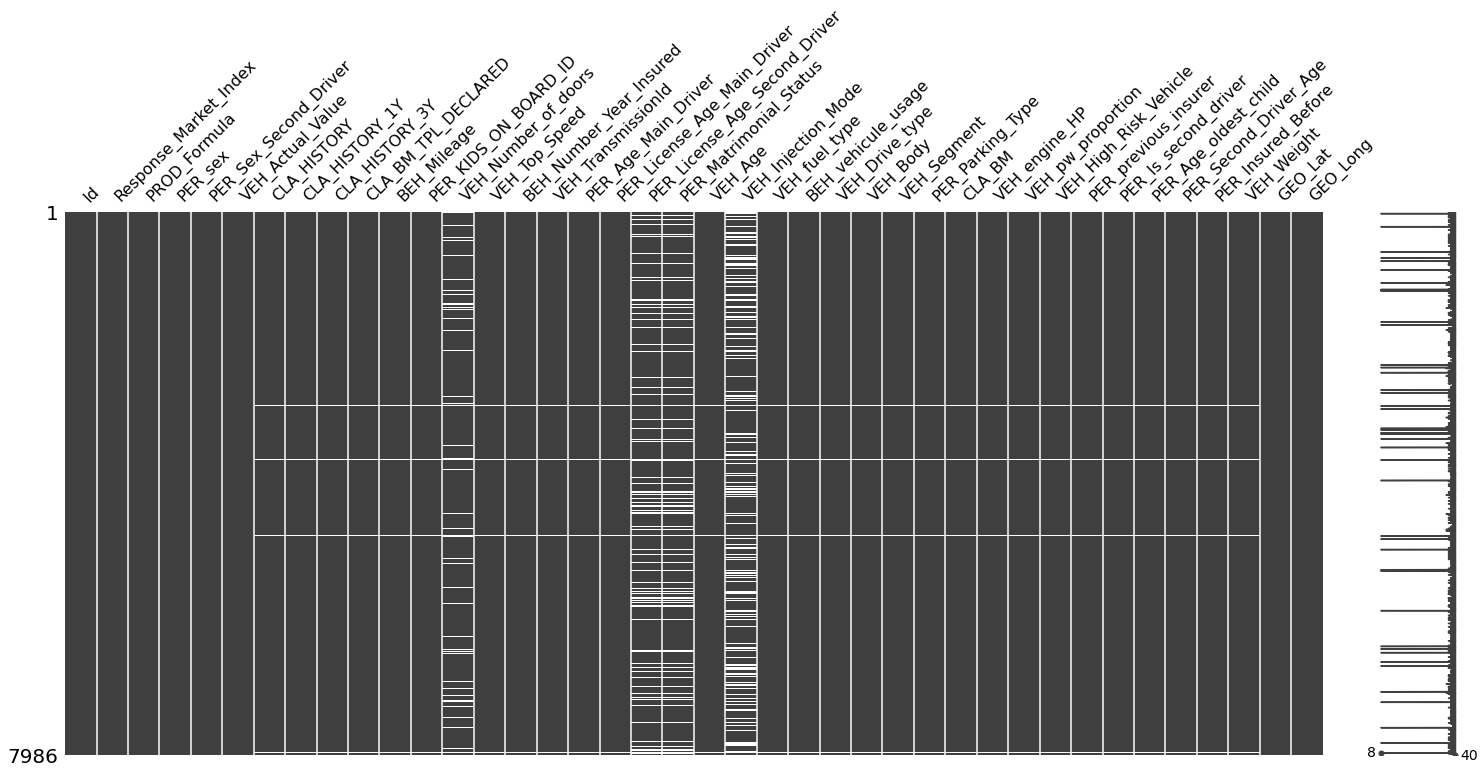

In [26]:
msno.matrix(train_set)

In [27]:
def show_missing(df):
       
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

show_missing(train_set).sort_values(by='missing', ascending = False)

variable    dtype  count  unique  missing  pc_missing
21             VEH_Injection_Mode   object   7986       6     2067       25.88
18  PER_License_Age_Second_Driver  float64   7986      42      850       10.64
19         PER_Matrimonial_Status   object   7986       5      850       10.64
12            VEH_Number_of_doors  float64   7986       5      615        7.70
24                 VEH_Drive_type   object   7986       9       43        0.54
34           PER_Age_oldest_child  float64   7986      29       43        0.54
22                  VEH_fuel_type   object   7986       3       43        0.54
23             BEH_vehicule_usage   object   7986       2       43        0.54
20                        VEH_Age  float64   7986      30       43        0.54
17    PER_License_Age_Main_Driver  float64   7986      61       43        0.54
26                    VEH_Segment   object   7986       9       43        0.54
27               PER_Parking_Type   object   7986       5       43        0.54
28                         CLA_BM  float64   7986      12       43        0.54
29                  VEH_engine_HP  float64   7986     167       43        0.54
30              VEH_pw_proportion  float64   7986     105       43        0.54
31          VEH_High_Risk_Vehicle   object   7986       3       43        0.54
25                       VEH_Body   object   7986      12       43        0.54
16            PER_Age_Main_Driver  float64   7986      69       43        0.54
33           PER_Is_second_driver   object   7986       3       43        0.54
15             VEH_TransmissionId   object   7986       3       43        0.54
14        BEH_Number_Year_Insured  float64   7986      13       43        0.54
13                  VEH_Top_Speed  float64   7986     118       43        0.54
11           PER_KIDS_ON_BOARD_ID   object   7986       4       43        0.54
10                    BEH_Mileage  float64   7986       8       43        0.54
9             CLA_BM_TPL_DECLARED  float64   7986      13       43        0.54
8                  CLA_HISTORY_3Y  float64   7986       4       43        0.54
7                  CLA_HISTORY_1Y  float64   7986       4       43        0.54
6                     CLA_HISTORY  float64   7986       4       43        0.54
35          PER_Second_Driver_Age  float64   7986      51       43        0.54
36             PER_Insured_Before   object   7986       4       43        0.54
37                     VEH_Weight  float64   7986     643       43        0.54
32           PER_previous_insurer   object   7986      16       43        0.54
38                        GEO_Lat  float64   7986     384        0        0.00
0                              Id   object   7986    7986        0        0.00
1           Response_Market_Index  float64   7986    1901        0        0.00
5                VEH_Actual_Value  float64   7986    2248        0        0.00
4           PER_Sex_Second_Driver   object   7986       3        0        0.00
3                         PER_sex   object   7986       2        0        0.00
2                    PROD_Formula   object   7986       2        0        0.00
39                       GEO_Long  float64   7986     550        0        0.00

## Univariate analysis

In [28]:
num_vars = list(train_set.select_dtypes(include='float64').columns)
cat_vars = list(train_set.select_dtypes(include=object).columns)

### Quantitative variables

In [29]:
def univariate_analysis_quant(var, data):
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
  sn.boxplot(data[var], ax=axs[0,0])
  sn.distplot(data[var], ax=axs[1,0])
  sn.ecdfplot(data[var], ax=axs[0,1])
  sn.violinplot(data[var], ax=axs[1,1]) 

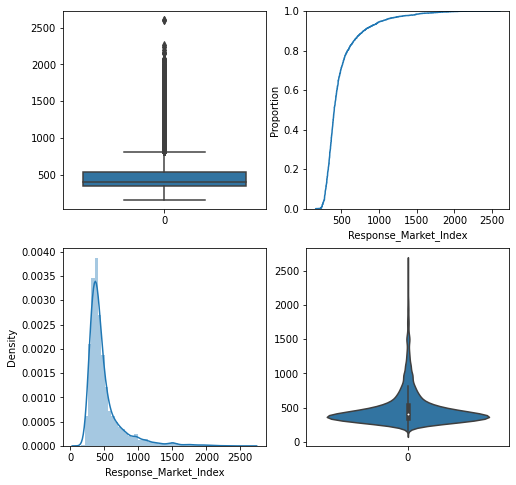

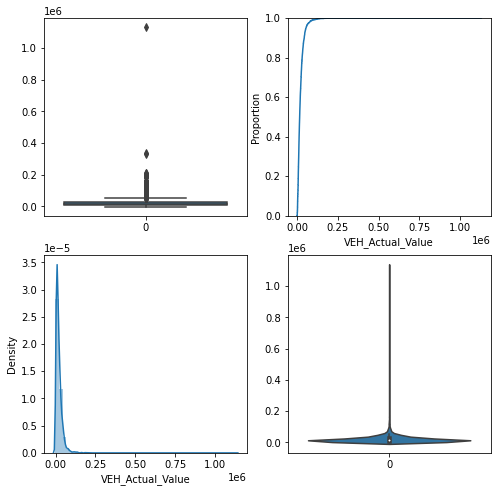

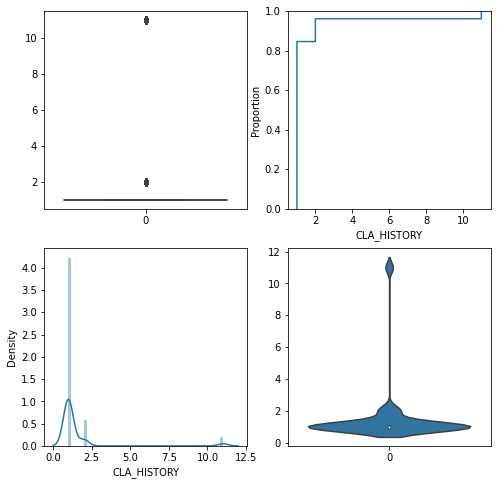

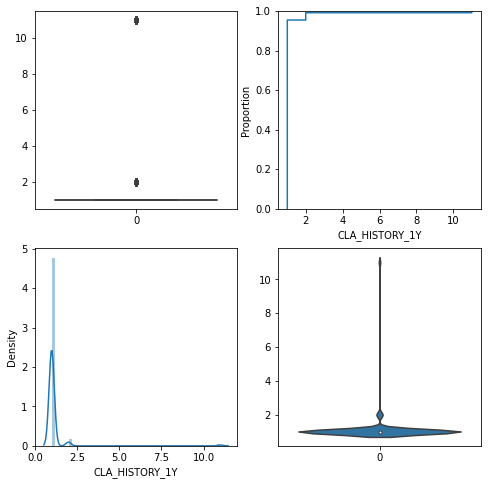

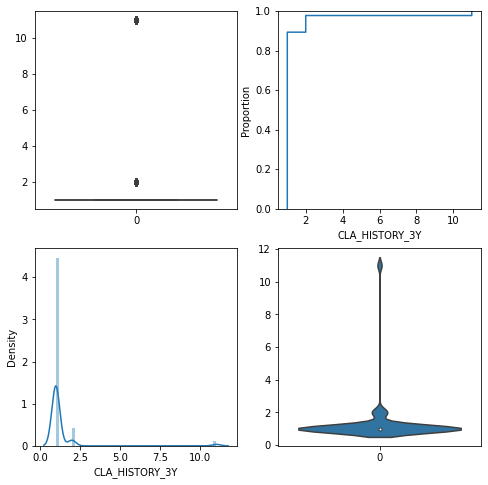

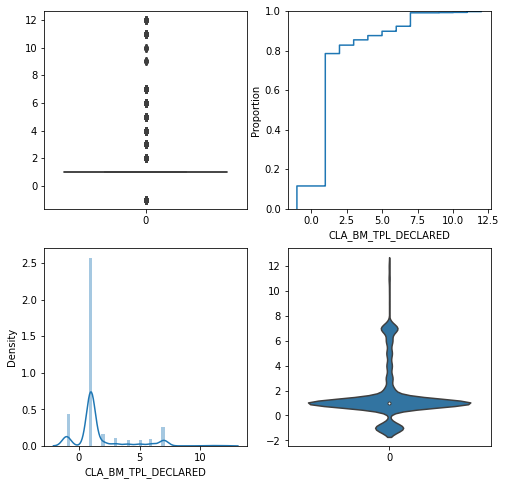

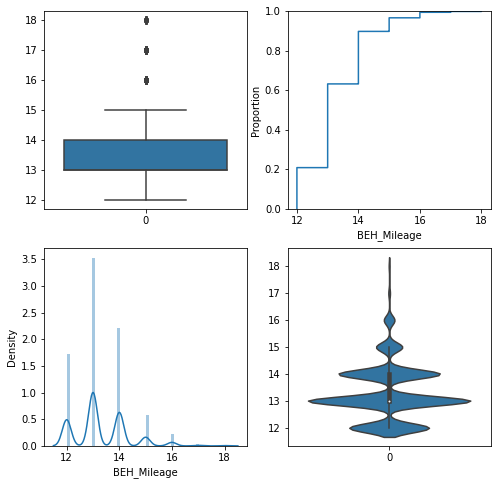

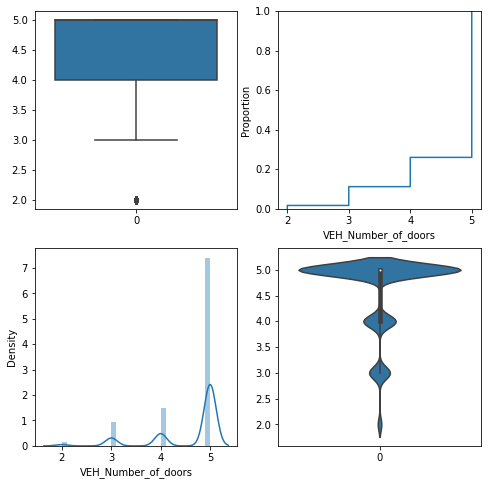

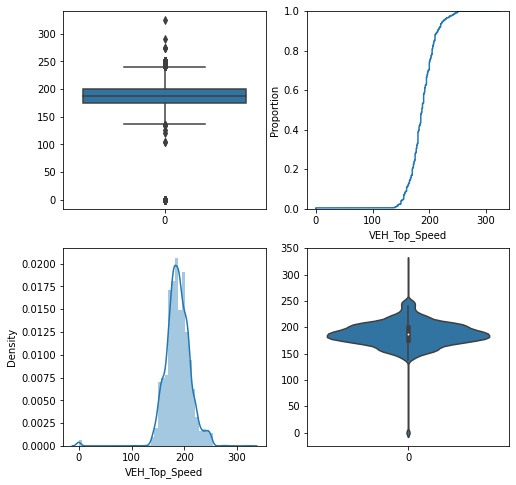

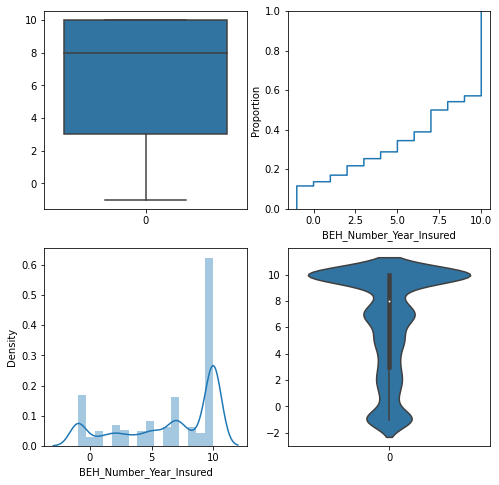

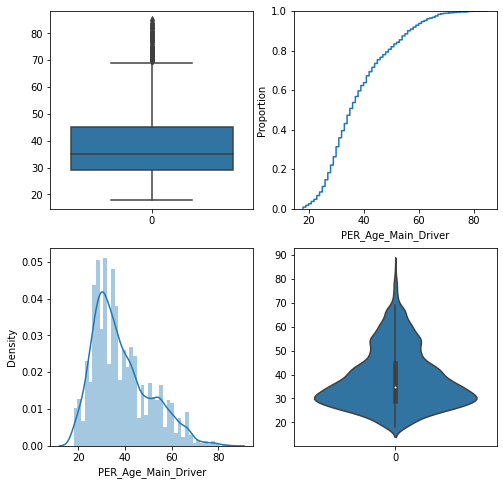

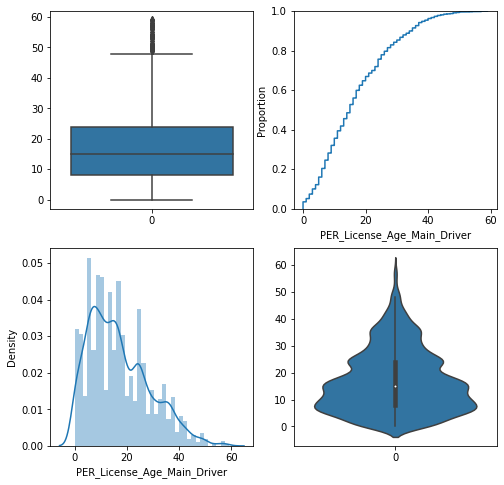

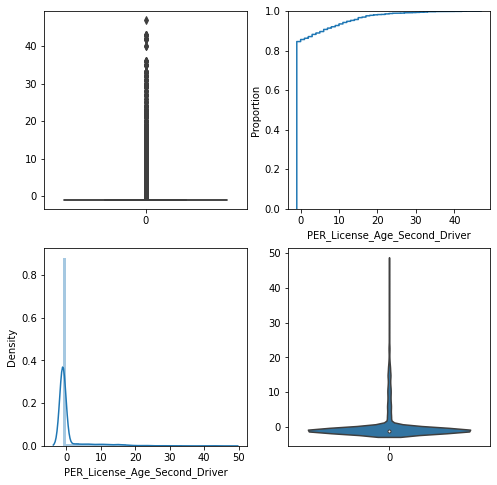

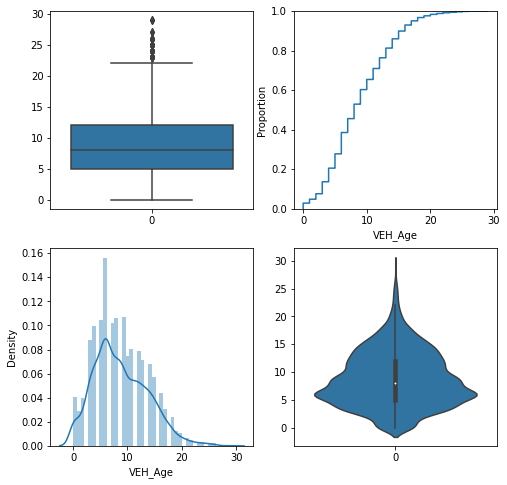

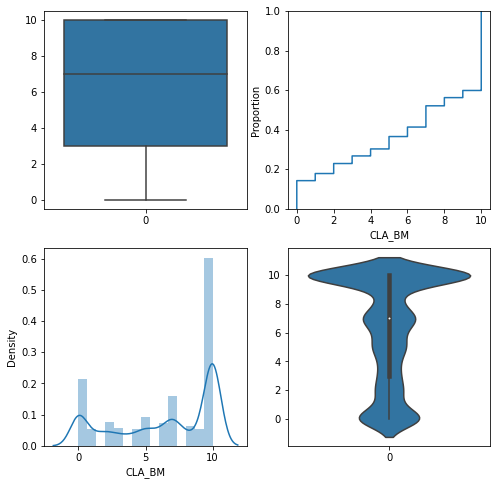

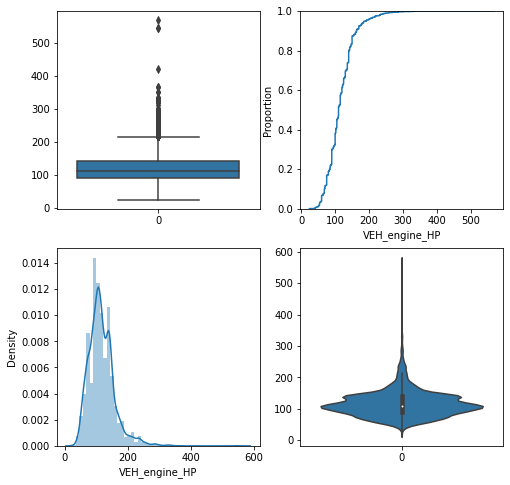

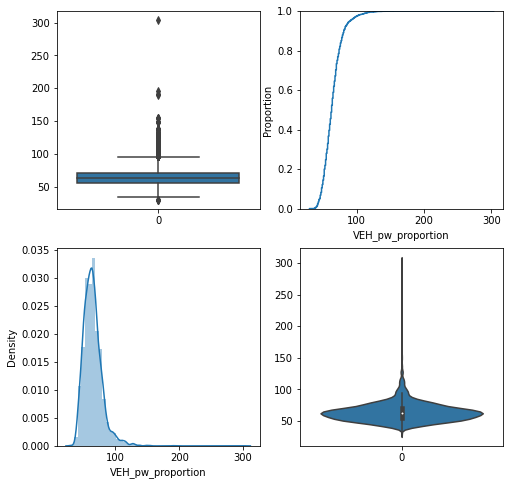

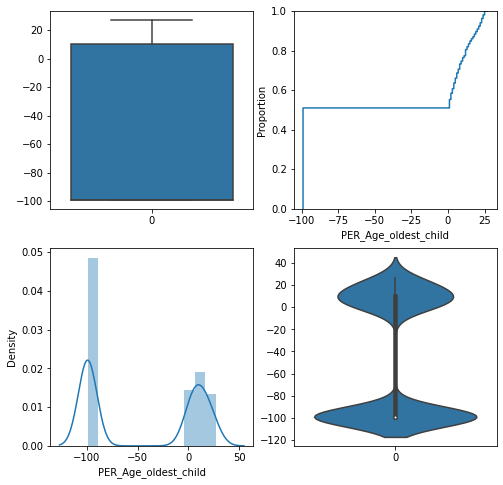

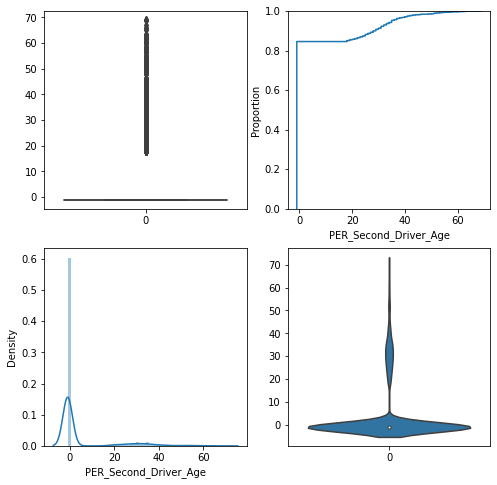

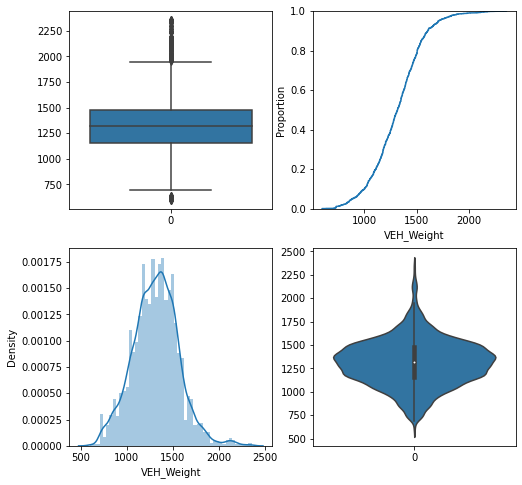

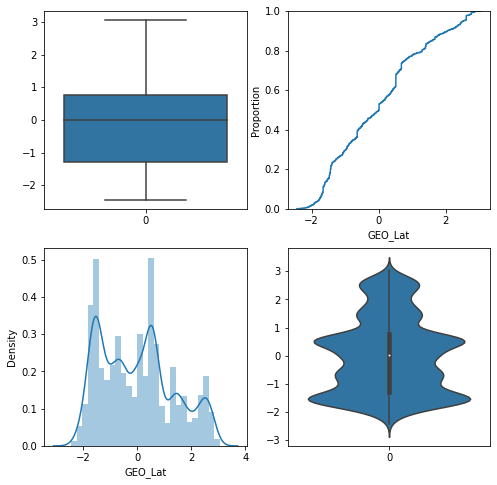

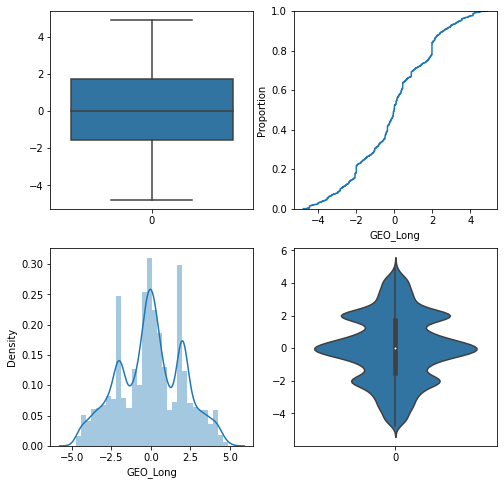

In [30]:
for var in num_vars:
  univariate_analysis_quant(var, train_set)

### Qualitative variables

In [31]:
def univariate_analysis_qual(var, data):
  fig, axs = plt.subplots(ncols=2, figsize=(6,4))
  sn.histplot(data[var], ax=axs[0])
  sn.ecdfplot(data[var], ax=axs[1])

In [32]:
cat_vars.remove('Id')

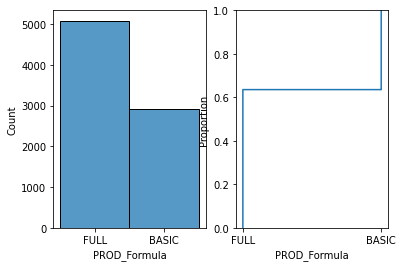

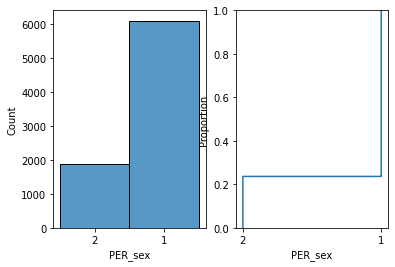

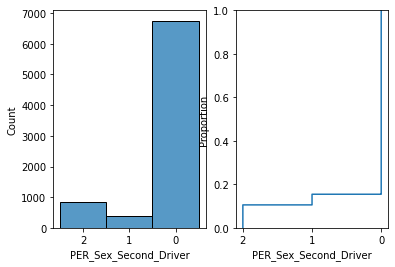

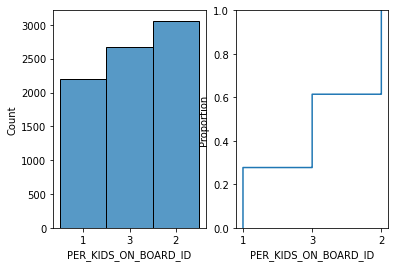

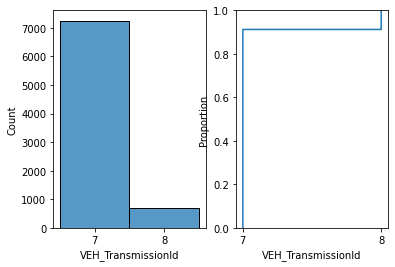

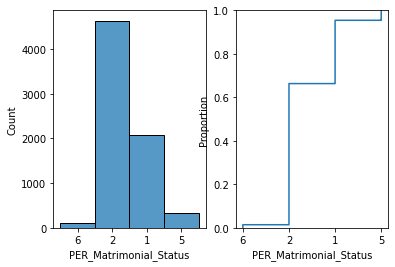

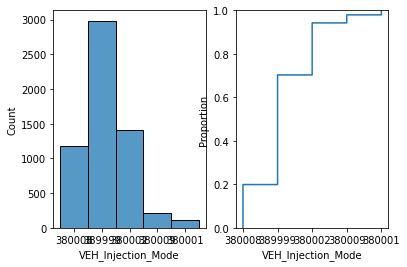

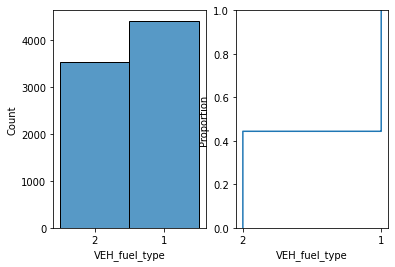

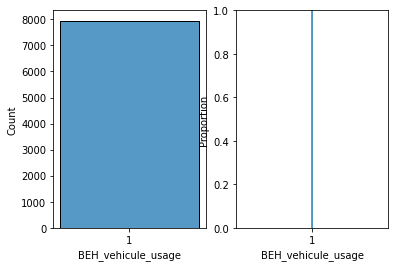

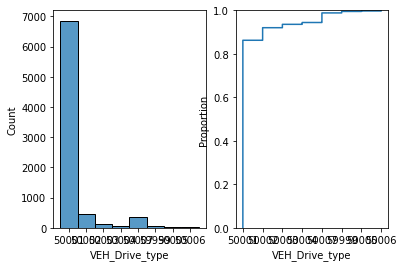

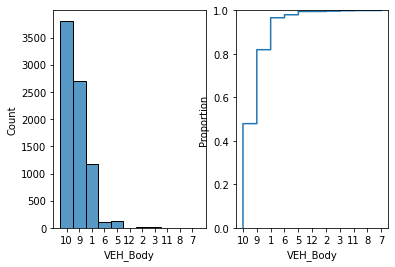

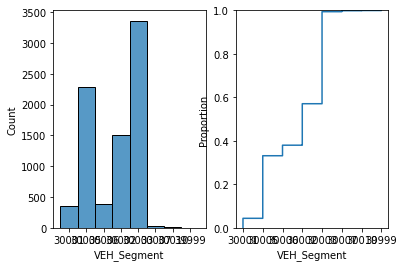

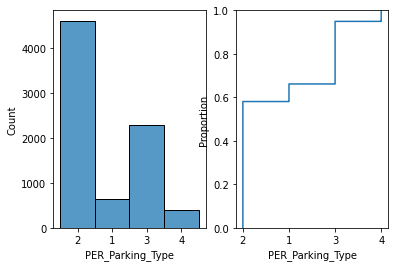

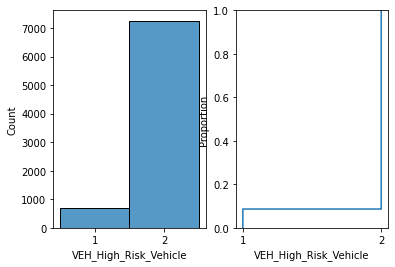

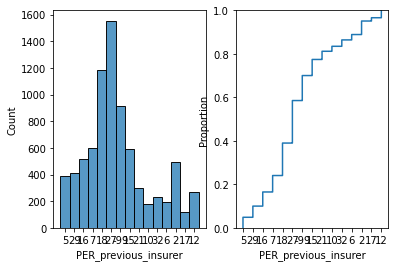

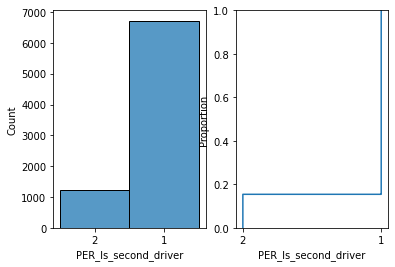

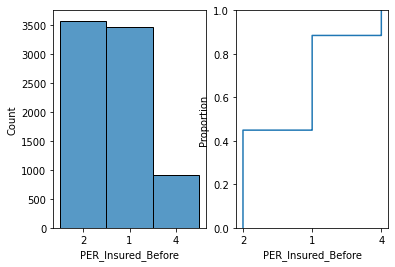

In [33]:
for var in cat_vars:
  univariate_analysis_qual(var, train_set)

## Multivariate analysis

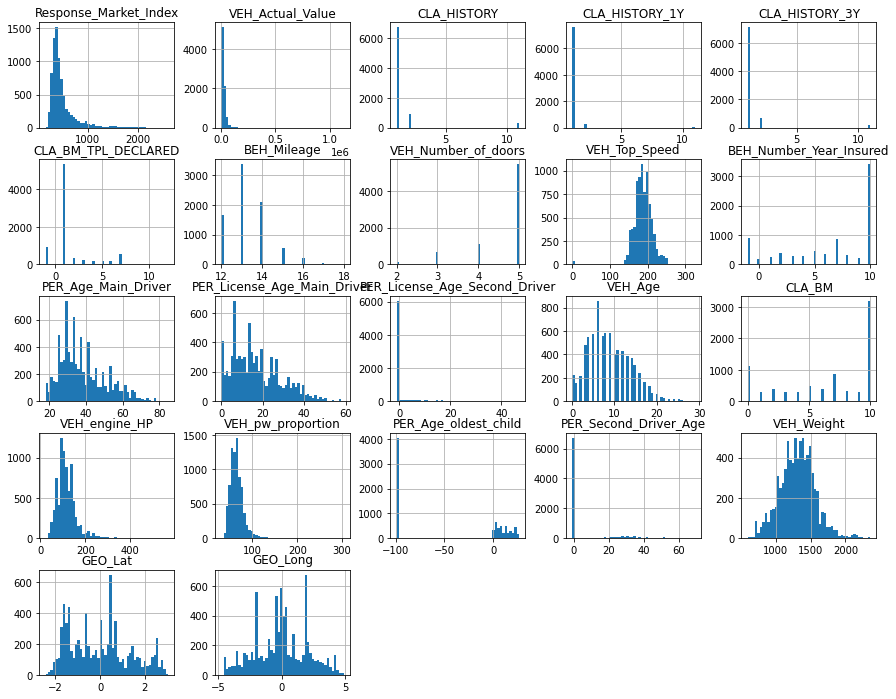

In [34]:
train_set.hist(bins=50, figsize=(15, 12))
plt.show()

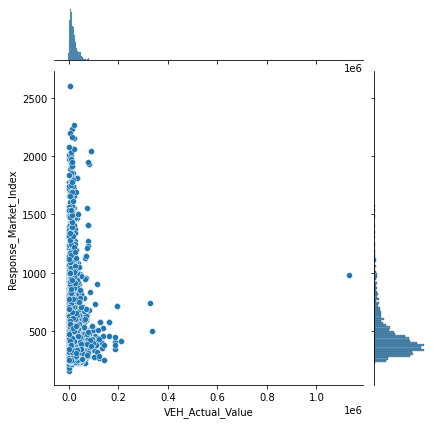

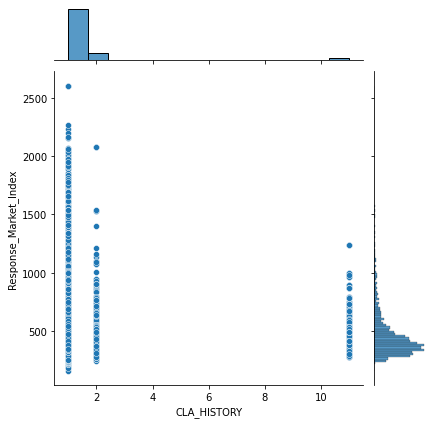

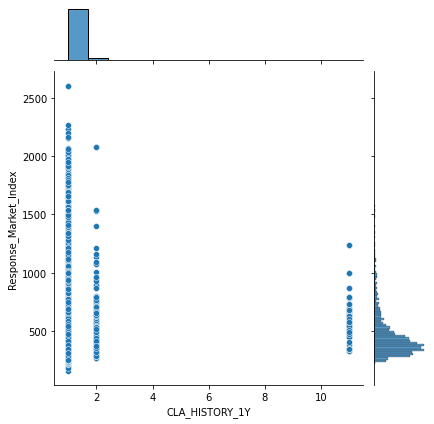

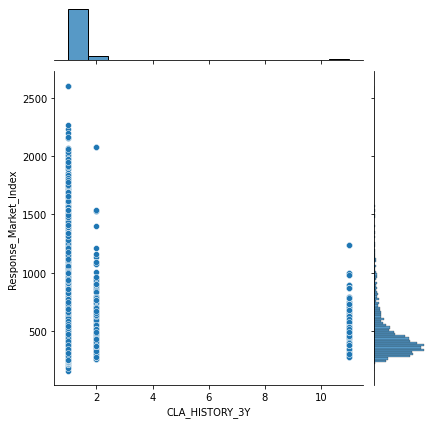

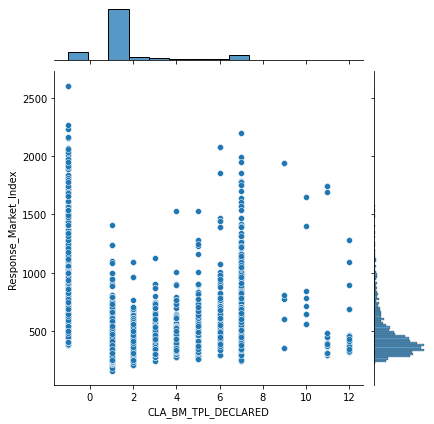

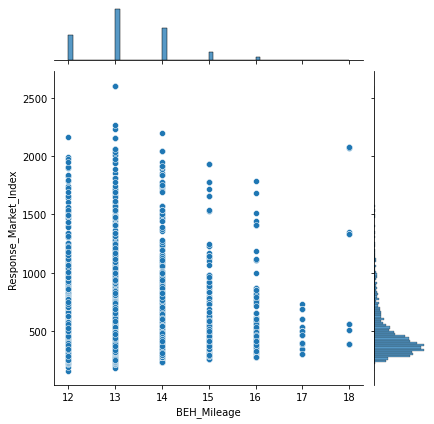

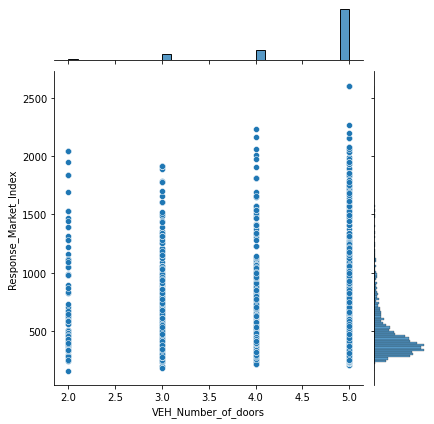

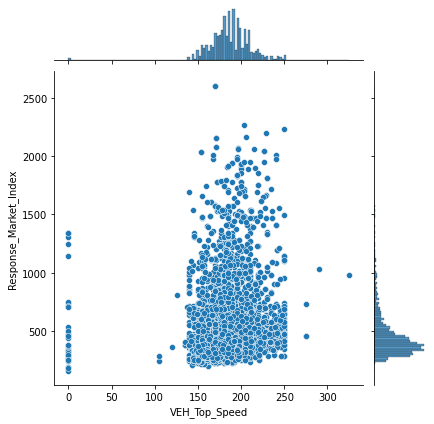

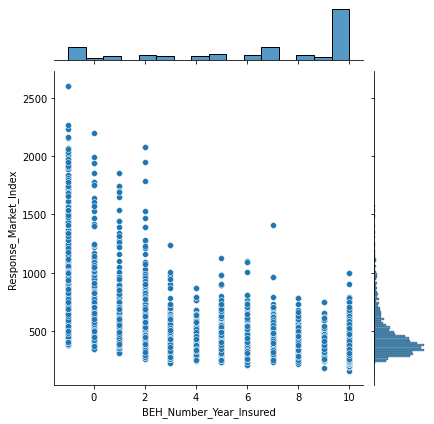

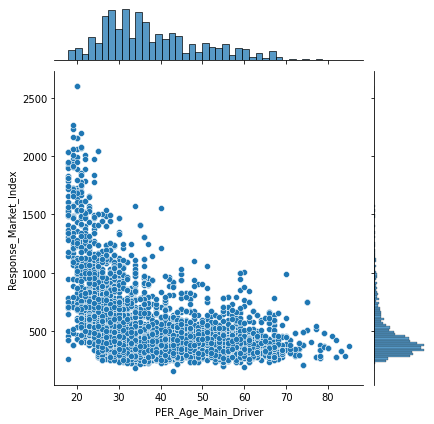

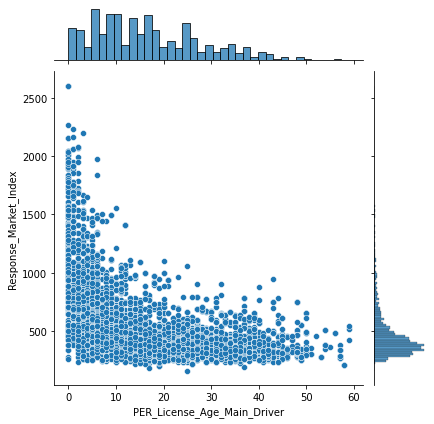

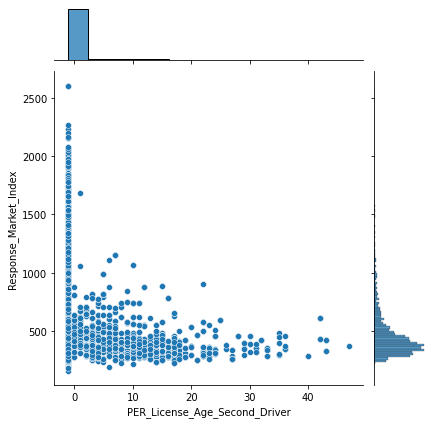

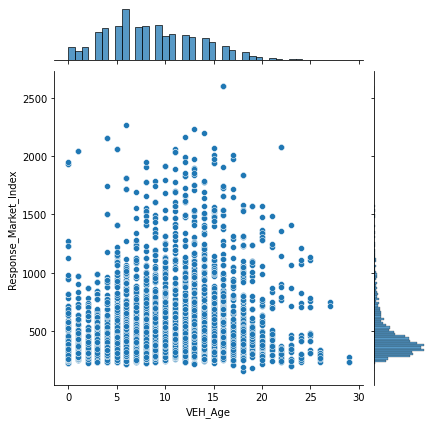

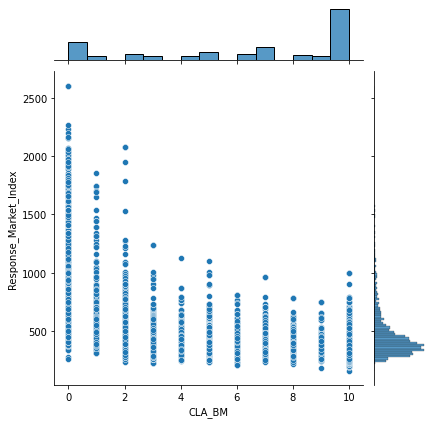

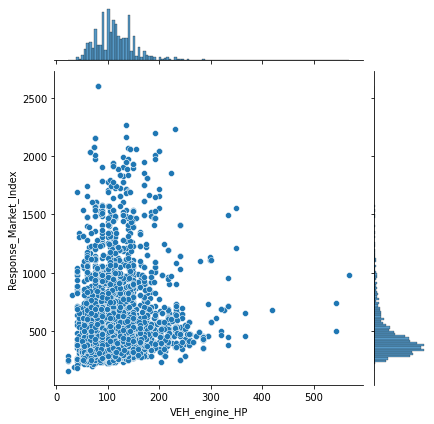

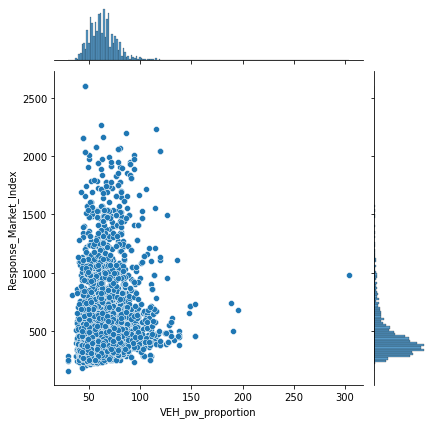

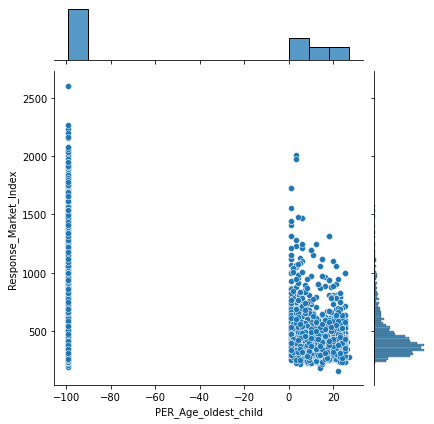

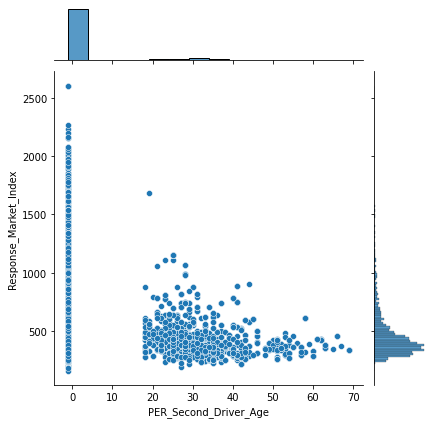

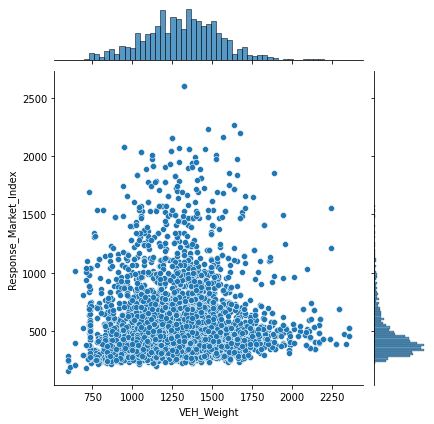

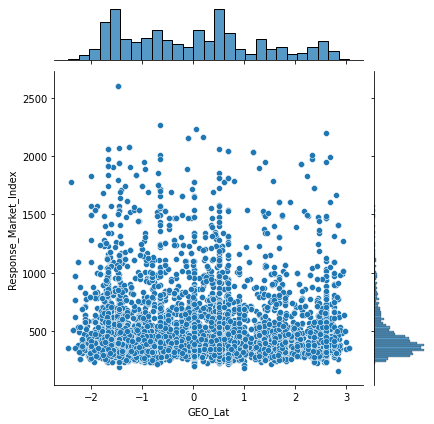

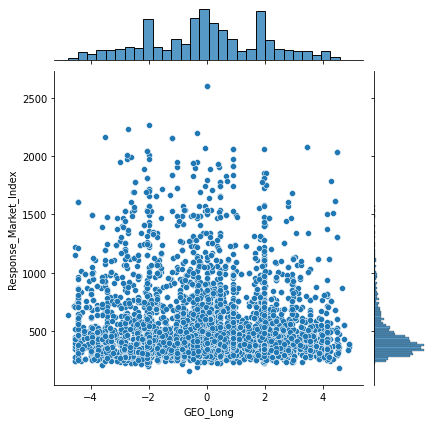

In [39]:
for var in num_vars[1:]:
    sn.jointplot(train_set, x=var, y='Response_Market_Index')

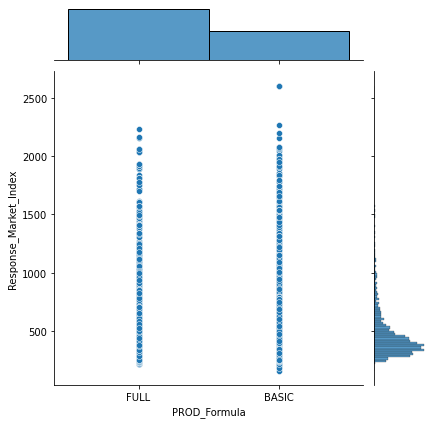

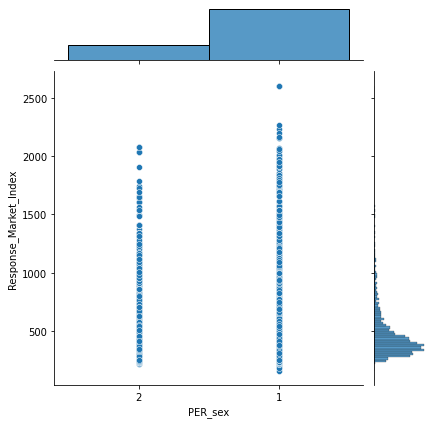

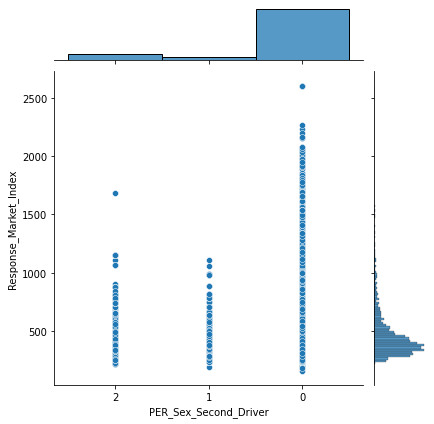

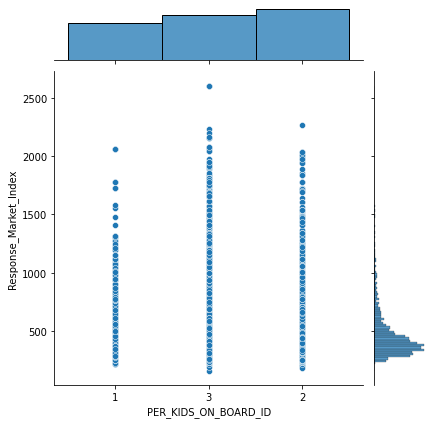

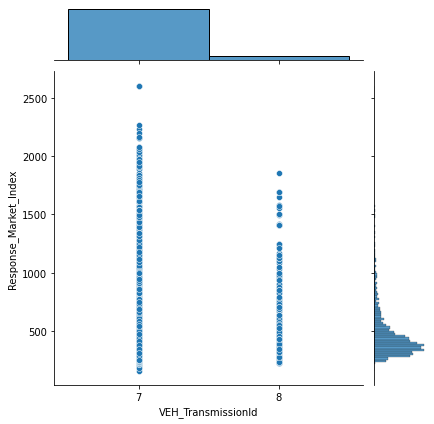

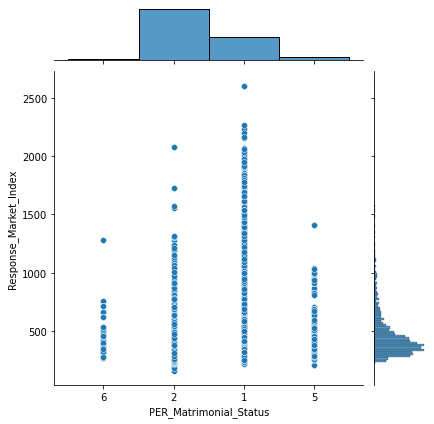

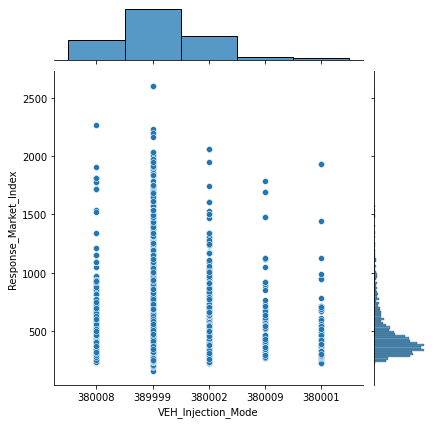

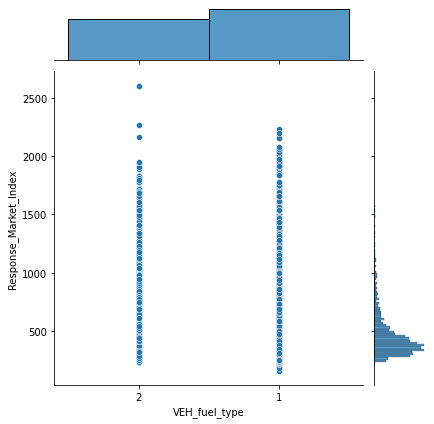

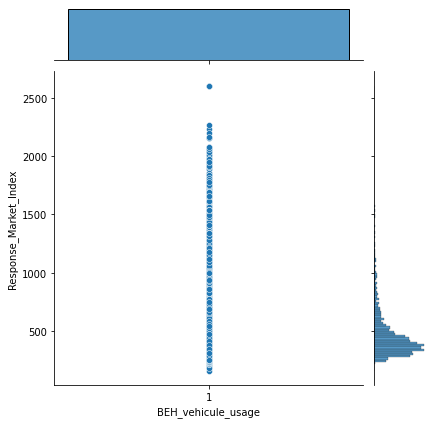

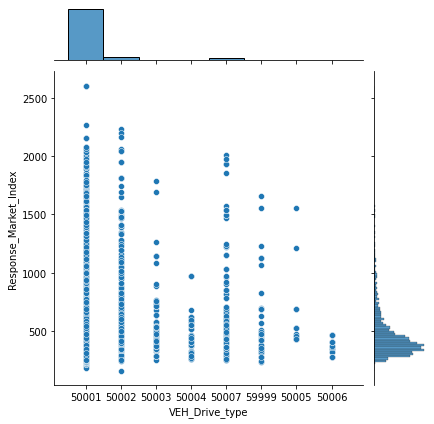

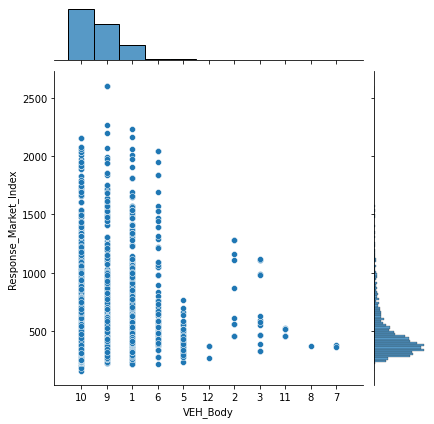

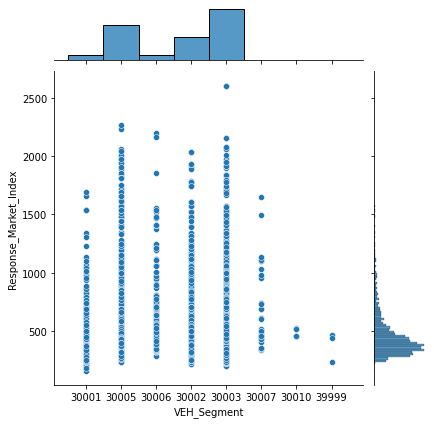

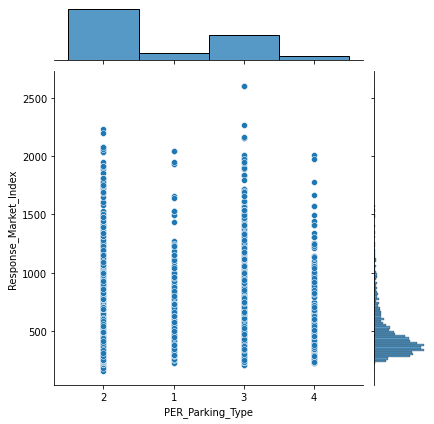

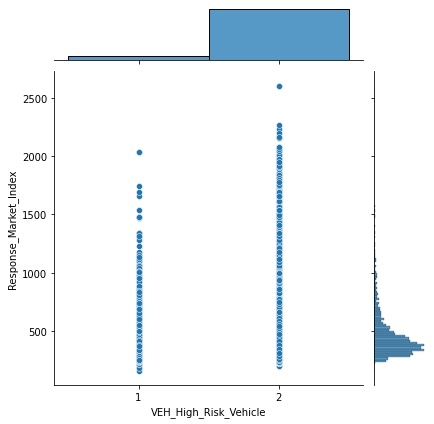

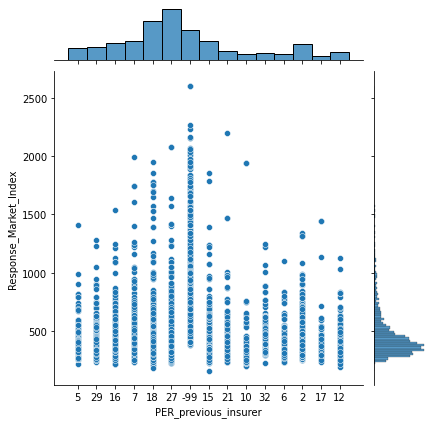

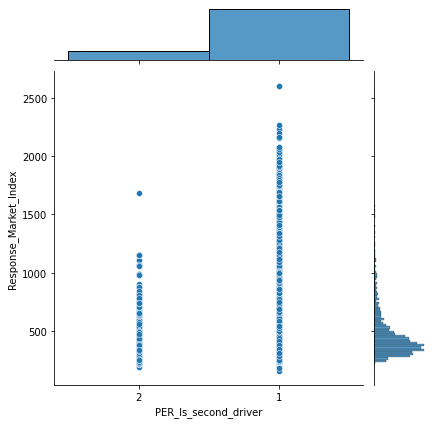

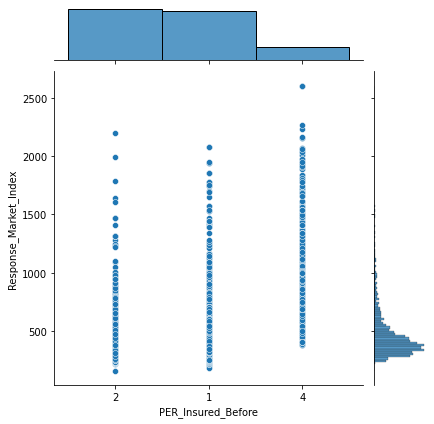

In [40]:
for var in cat_vars:
    sn.jointplot(train_set, x=var, y='Response_Market_Index')

### Visualizing geographical data

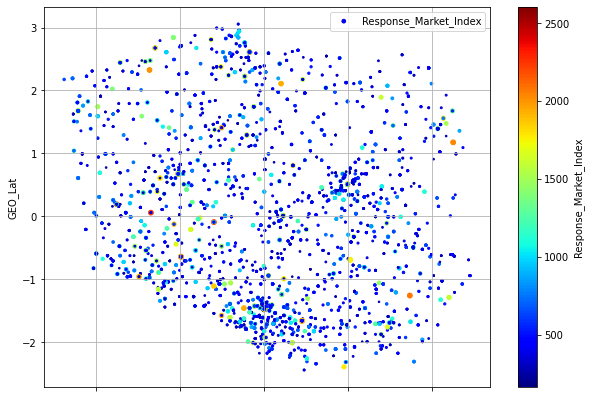

In [41]:
train_set.plot(kind="scatter", x="GEO_Long", y="GEO_Lat", grid=True,
             s=train_set["Response_Market_Index"] / 100, label="Response_Market_Index",
             c="Response_Market_Index", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))
plt.show()

### Correlations

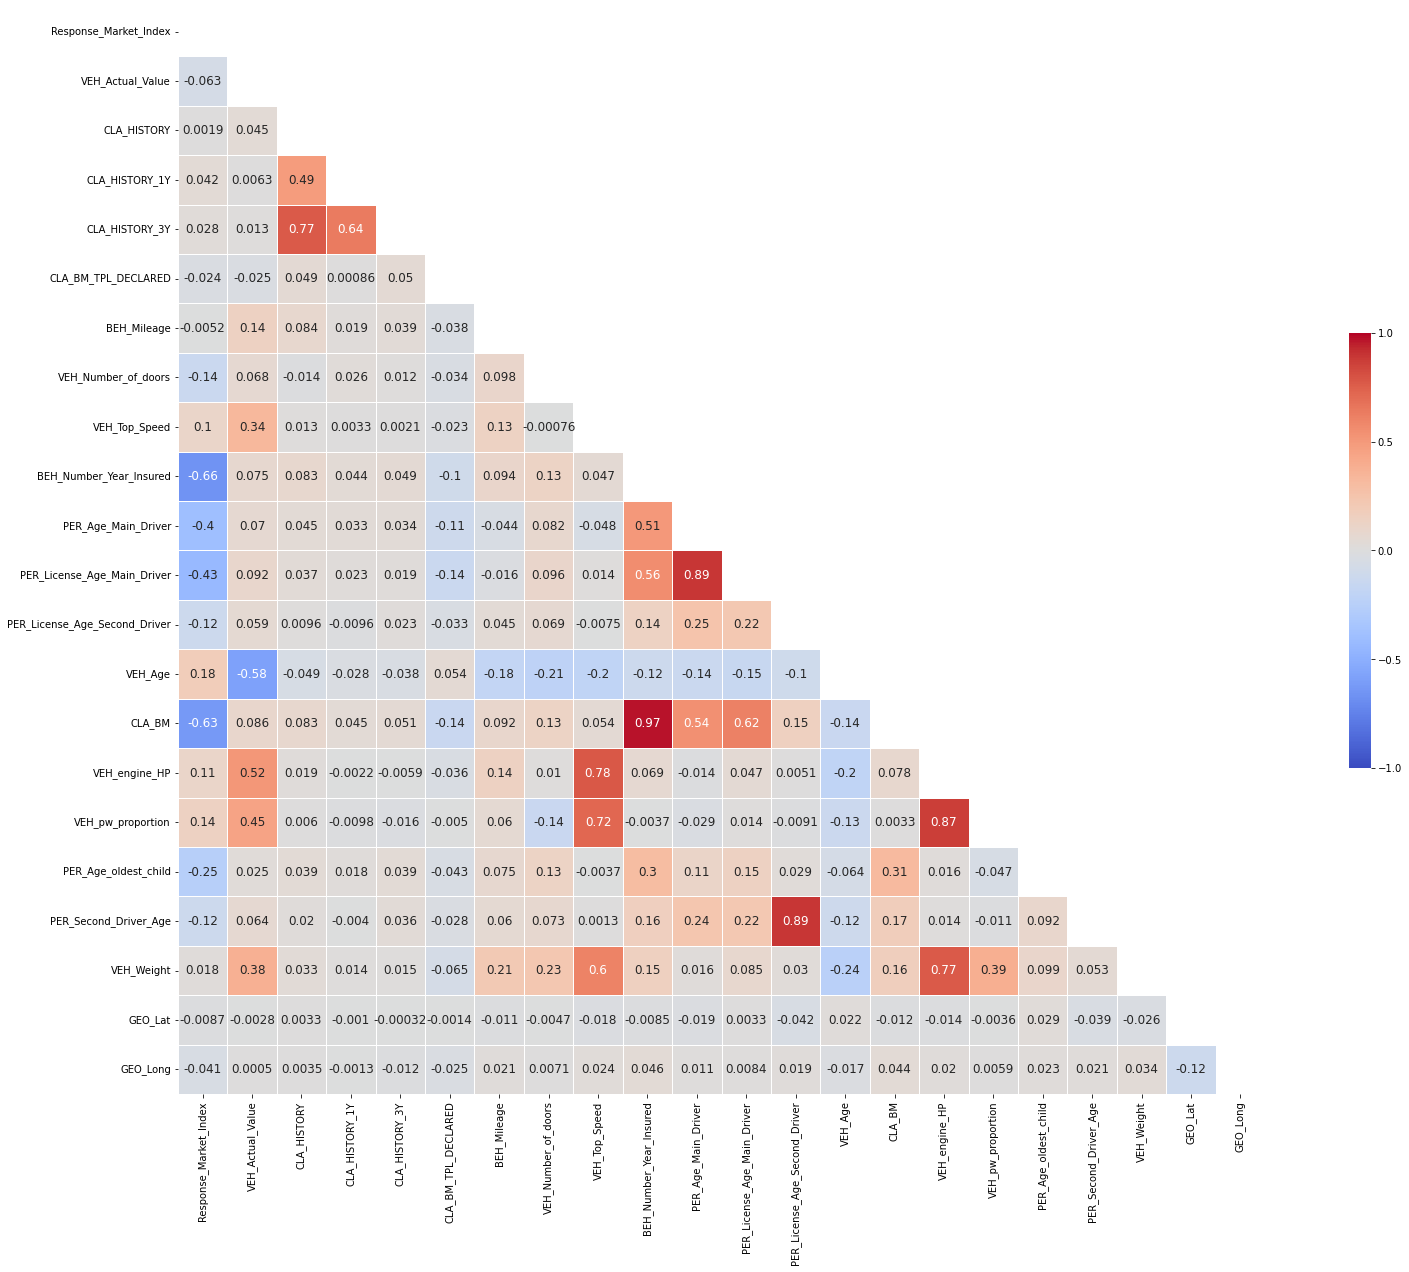

In [42]:
corr=train_set.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 20))

heatmap = sn.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)

sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [43]:
np.abs(corr["Response_Market_Index"]).sort_values(ascending=False)

Response_Market_Index            1.000000
BEH_Number_Year_Insured          0.659246
CLA_BM                           0.632406
PER_License_Age_Main_Driver      0.431374
PER_Age_Main_Driver              0.396223
PER_Age_oldest_child             0.252857
VEH_Age                          0.181078
VEH_pw_proportion                0.144762
VEH_Number_of_doors              0.136770
PER_Second_Driver_Age            0.123417
PER_License_Age_Second_Driver    0.119943
VEH_engine_HP                    0.108216
VEH_Top_Speed                    0.103854
VEH_Actual_Value                 0.062841
CLA_HISTORY_1Y                   0.041551
GEO_Long                         0.040585
CLA_HISTORY_3Y                   0.028366
CLA_BM_TPL_DECLARED              0.023525
VEH_Weight                       0.017703
GEO_Lat                          0.008709
BEH_Mileage                      0.005151
CLA_HISTORY                      0.001883
Name: Response_Market_Index, dtype: float64

In [44]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

train_set_cat = train_set.drop(['Id', 'BEH_vehicule_usage'], axis=1).select_dtypes(include='object')

for var1 in train_set_cat:
  col = []
  for var2 in train_set_cat.columns :
    cramers =cramers_V(train_set[var1], train_set[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corr = pd.DataFrame(cramers_results, columns = train_set_cat.columns, index =train_set_cat.columns)

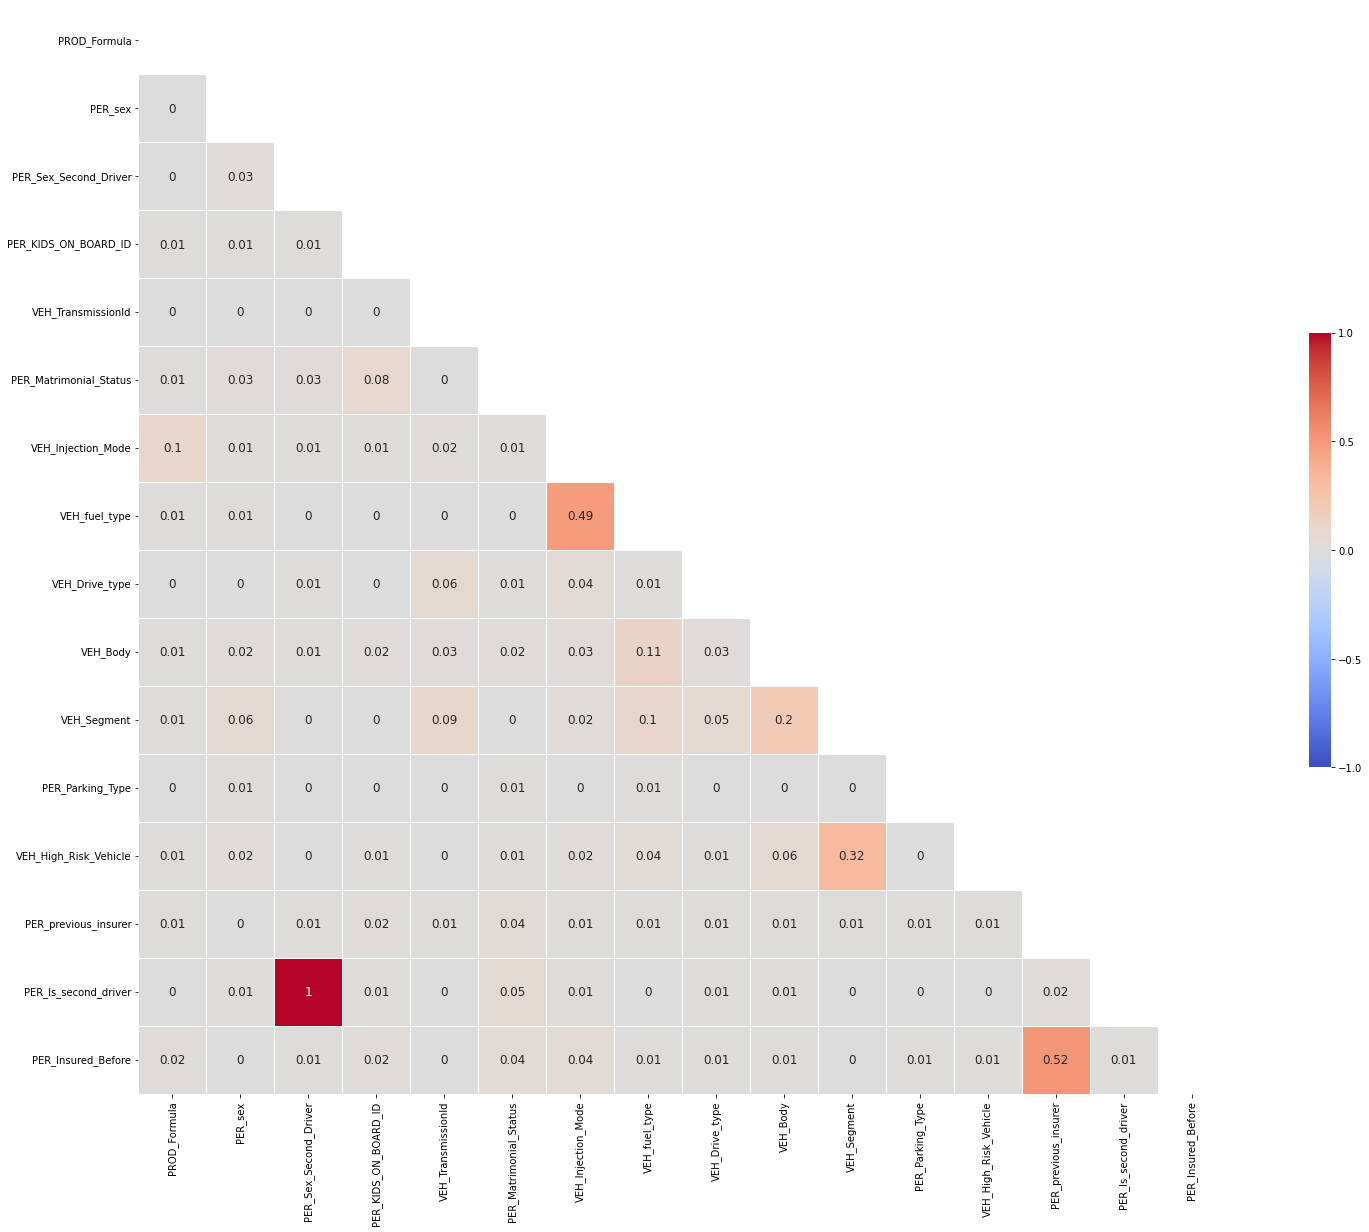

In [45]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 20))

heatmap = sn.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)

sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Prepare for modelling

In [46]:
def prepare_data(data):
  data.loc[data.VEH_Actual_Value < 0, "VEH_Actual_Value"] = - data["VEH_Actual_Value"][data.VEH_Actual_Value < 0]

In [47]:
prepare_data(train_set)
prepare_data(test_set)

In [48]:
X_train = train_set.drop("Response_Market_Index", axis=1)
y_train = train_set["Response_Market_Index"]
X_test = test_set.drop("Response_Market_Index", axis=1)
y_test = test_set["Response_Market_Index"]

In [49]:
sklearn.set_config(display="diagram") #pour vscode (automatique sur colab)

In [50]:
log_pipeline = Pipeline(steps=[
    ('missing_median' , SimpleImputer(strategy="median")),
    ('log_transformer', FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one")) 
    #('log_transformer', FunctionTransformer(np.log, inverse_func=np.exp)) 
])

num_pipeline = Pipeline(steps=[
    ('num_columns_transformer', ColumnTransformer(transformers=[
        ('missing_knn',KNNImputer(n_neighbors=3),['VEH_Number_of_doors']),
        ('missing_1', SimpleImputer(strategy="constant", fill_value=-1), ['CLA_BM_TPL_DECLARED',
                                                                          'BEH_Number_Year_Insured', 
                                                                          'PER_Second_Driver_Age',
                                                                          'PER_License_Age_Second_Driver']),
        ('missing_99', SimpleImputer(strategy="constant", fill_value=-99), ['PER_Age_oldest_child']),
        ('log', log_pipeline, ['PER_Age_Main_Driver',
                               'VEH_engine_HP',
                               'VEH_pw_proportion',
                               'VEH_Weight']),
        ('missing_median', SimpleImputer(strategy="median"), ['VEH_Actual_Value',
                                                               'CLA_HISTORY',
                                                               'CLA_HISTORY_1Y',
                                                               'CLA_HISTORY_3Y',
                                                               'BEH_Mileage',
                                                               'VEH_Top_Speed',
                                                               'PER_Age_Main_Driver',
                                                               'PER_License_Age_Main_Driver',
                                                               'VEH_Age',
                                                               'CLA_BM',
                                                               'VEH_engine_HP',
                                                               'VEH_pw_proportion',
                                                               'VEH_Weight'])

                                                              
    ])
  ),
  ('scale', StandardScaler())
])


cat_pipeline = Pipeline(steps=[
    ('cat_columns_transformer', ColumnTransformer(transformers=[
        ('missing_99', SimpleImputer(strategy="constant", fill_value="-99"), ['PER_previous_insurer']),
        ('missing_most_frequent', SimpleImputer(strategy="most_frequent"), ['PROD_Formula',
                                                                            'PER_sex',                                                                          
                                                                            'PER_KIDS_ON_BOARD_ID',
                                                                            'VEH_TransmissionId',
                                                                            'PER_Matrimonial_Status',
                                                                            'VEH_Injection_Mode',
                                                                            'VEH_fuel_type',
                                                                            'VEH_Drive_type',
                                                                            'VEH_Body',
                                                                            'VEH_Segment',
                                                                            'PER_Parking_Type',
                                                                            'VEH_High_Risk_Vehicle',
                                                                            'PER_previous_insurer',
                                                                            'PER_Is_second_driver',
                                                                            'PER_Insured_Before'])
                                                              
    ])
  ),
  ('one_hot', OneHotEncoder(handle_unknown="ignore"))
])

   
preprocessing = ColumnTransformer(
      transformers=[
          ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
          ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_columns_transformer',
                                                  ColumnTransformer(transformers=[('missing_knn',
                                                                                   KNNImputer(n_neighbors=3),
                                                                                   ['VEH_Number_of_doors']),
                                                                                  ('missing_1',
                                                                                   SimpleImputer(fill_value=-1,
                                                                                                 strategy='constant'),
                                                                                   ['CLA_BM_TPL_DECLARED',
                                                                                    'BEH_Number_Year_Insured',
                                                                                    'PER_Second_Driver_Age',
                                                                                    'PER_License_Age_Second_Driver']),
                                                                                  (...
                                                                                    'PER_Matrimonial_Status',
                                                                                    'VEH_Injection_Mode',
                                                                                    'VEH_fuel_type',
                                                                                    'VEH_Drive_type',
                                                                                    'VEH_Body',
                                                                                    'VEH_Segment',
                                                                                    'PER_Parking_Type',
                                                                                    'VEH_High_Risk_Vehicle',
                                                                                    'PER_previous_insurer',
                                                                                    'PER_Is_second_driver',
                                                                                    'PER_Insured_Before'])])),
                                                 ('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])

# Select and train model

In [51]:
def MAPE(model, X, y):
  y_pred = model.predict(X)
  return mean_absolute_percentage_error(y, y_pred)

## Linear regression

In [52]:
lin_reg = make_pipeline(preprocessing,
                        TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
                        )
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'VEH_High_Risk_Vehicle',
                                                                                                     'PER_previous_insurer',
                                                                                                     'PER_Is_second_driver',
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

In [53]:
print("MAPE on train set : ", MAPE(lin_reg,X_train,y_train))
print("MAPE on test set  : ", MAPE(lin_reg,X_test,y_test))

MAPE on train set :  0.16479869152799528
MAPE on test set  :  0.16993259382683776


## Lasso/Ridge

In [54]:
lin_reg_ridge = make_pipeline(preprocessing,
                        TransformedTargetRegressor(Ridge(alpha=0.5), func=np.log, inverse_func=np.exp)
                        )
lin_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'VEH_High_Risk_Vehicle',
                                                                                                     'PER_previous_insurer',
                                                                                                     'PER_Is_second_driver',
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Ridge(alpha=0.5)))])

In [55]:
print("MAPE on train set : ", MAPE(lin_reg_ridge,X_train,y_train))
print("MAPE on test set  : ", MAPE(lin_reg_ridge,X_test,y_test))

MAPE on train set :  0.16480894805280344
MAPE on test set  :  0.1698838127346274


In [56]:
lin_reg_lasso = make_pipeline(preprocessing,
                        TransformedTargetRegressor(Lasso(alpha=0.001), func=np.log, inverse_func=np.exp)
                        )
lin_reg_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'VEH_High_Risk_Vehicle',
                                                                                                     'PER_previous_insurer',
                                                                                                     'PER_Is_second_driver',
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Lasso(alpha=0.001)))])

In [57]:
print("MAPE on train set : ", MAPE(lin_reg_lasso,X_train,y_train))
print("MAPE on test set  : ", MAPE(lin_reg_lasso,X_test,y_test))

MAPE on train set :  0.16652334953574646
MAPE on test set  :  0.1705418589161021


## SVM

In [58]:
svm_reg = make_pipeline(preprocessing,
                           TransformedTargetRegressor(svm.SVR(),
                                                      func=np.log, inverse_func=np.exp)
                           )
svm_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'VEH_High_Risk_Vehicle',
                                                                                                     'PER_previous_insurer',
                                                                                                     'PER_Is_second_driver',
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=SVR()))])

In [59]:
print("MAPE on train set : ", MAPE(svm_reg,X_train,y_train))
print("MAPE on test set  : ", MAPE(svm_reg,X_test,y_test))

MAPE on train set :  0.09405801698796258
MAPE on test set  :  0.11215182253362606


In [60]:
svm_rmses = -cross_val_score(svm_reg, X_train, y_train,
                                scoring="neg_mean_absolute_percentage_error", cv=5)

pd.Series(svm_rmses).describe()

count    5.000000
mean     0.118029
std      0.000860
min      0.117283
25%      0.117364
50%      0.117653
75%      0.118595
max      0.119252
dtype: float64

## Decision Tree

In [61]:
tree_reg = make_pipeline(preprocessing, 
                         TransformedTargetRegressor(DecisionTreeRegressor(random_state=0), func=np.log, inverse_func=np.exp)
                         )
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'PER_previous_insurer',
                                                                                                     'PER_Is_second_driver',
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=DecisionTreeRegressor(random_state=0)))])

In [62]:
print("MAPE on train set : ", MAPE(tree_reg,X_train,y_train))
print("MAPE on test set  : ", MAPE(tree_reg,X_test,y_test))

MAPE on train set :  0.0033177817125575743
MAPE on test set  :  0.06361918644530568


In [63]:
tree_rmses = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_absolute_percentage_error", cv=10)

In [64]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.065848
std       0.006895
min       0.056201
25%       0.063372
50%       0.065314
75%       0.069101
max       0.079493
dtype: float64

## Random forest

In [65]:
forest_reg = make_pipeline(preprocessing,
                           TransformedTargetRegressor(RandomForestRegressor(n_estimators=1000, max_features= 25, random_state=0), func=np.log, inverse_func=np.exp)
                           )
forest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                                                     'PER_Insured_Before'])])),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36503de490>)])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(max_features=25,
                                                                            n_estimators=1000,
                                                                            random_state=0)))])

In [66]:
print("MAPE on train set : ", MAPE(forest_reg,X_train,y_train))
print("MAPE on test set  : ", MAPE(forest_reg,X_test,y_test))

MAPE on train set :  0.025586206482343613
MAPE on test set  :  0.0635902528432498


In [67]:
forest_rmses = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_absolute_percentage_error", cv=5)

pd.Series(forest_rmses).describe()

count    5.000000
mean     0.075027
std      0.003654
min      0.070789
25%      0.073098
50%      0.073605
75%      0.078154
max      0.079489
dtype: float64

In [68]:
feat_importances = forest_reg.named_steps["transformedtargetregressor"].regressor_.feature_importances_
feat_names = forest_reg.named_steps["columntransformer"].get_feature_names_out()

In [69]:
feat_importances = pd.Series(feat_importances, index=feat_names)
feat_importances.sort_values(ascending=False).head(10)

num__missing_median__CLA_BM                             0.160711
num__missing_1__BEH_Number_Year_Insured                 0.130208
num__missing_1__CLA_BM_TPL_DECLARED                     0.067863
num__missing_median__PER_License_Age_Main_Driver        0.065892
cat__missing_most_frequent__PER_previous_insurer_-99    0.062762
cat__missing_most_frequent__PER_Insured_Before_4        0.061816
num__missing_median__PER_Age_Main_Driver                0.046196
num__log__PER_Age_Main_Driver                           0.046106
cat__missing_99__PER_previous_insurer_-99               0.030100
num__missing_median__VEH_Top_Speed                      0.023105
dtype: float64

In [70]:
param_grid = [
    {
     'transformedtargetregressor__regressor__max_features': [5, 15, 20, 25],
     'transformedtargetregressor__regressor__n_estimators' : [100, 500, 1000]
     },
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_columns_transformer',
                                                                                          ColumnTransformer(transformers=[('missing_knn',
                                                                                                                           KNNImputer(n_neighbors=3),
                                                                                                                           ['VEH_Number_of_doors']),
                                                                                                                          ('missing_1',
                                                                                                                           SimpleImputer(fill_value=-1,
                                                                                                                                         strategy='constant'),
                                                                                                                           ['CLA_BM_TPL_DECLARED',
                                                                                                                            'BEH_Number_Year_Ins...
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor(max_features=25,
                                                                                                   n_estimators=1000,
                                                                                                   random_state=0)))]),
             param_grid=[{'transformedtargetregressor__regressor__max_features': [5,
                                                                                  15,
                                                                                  20,
                                                                                  25],
                          'transformedtargetregressor__regressor__n_estimators': [100,
                                                                                  500,
                                                                                  1000]}],
             scoring='neg_mean_absolute_percentage_error')

In [71]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
score_cols = ["mean_test_score"]
cv_res[score_cols] = -cv_res[score_cols]
cv_res

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11      25.045445      0.247851         0.528267        0.050799   
10      12.556196      0.101538         0.294406        0.018142   
8       21.424092      0.118506         0.514017        0.012439   
7       10.629322      0.159692         0.316498        0.039289   
9        2.650178      0.193719         0.106237        0.008415   
5       17.594043      0.294722         0.518427        0.035775   
4        8.969604      0.435902         0.292755        0.031683   
6        2.305396      0.127162         0.109215        0.010371   
3        1.948307      0.178690         0.106330        0.002801   
2        9.533733      0.197385         0.518101        0.054771   
1        4.852513      0.220968         0.309414        0.049038   
0        1.204854      0.181692         0.121232        0.034126   

   param_transformedtargetregressor__regressor__max_features  \
11                                                 25          
10                                                 25          
8                                                  20          
7                                                  20          
9                                                  25          
5                                                  15          
4                                                  15          
6                                                  20          
3                                                  15          
2                                                   5          
1                                                   5          
0                                                   5          

   param_transformedtargetregressor__regressor__n_estimators  \
11                                               1000          
10                                                500          
8                                                1000          
7                                                 500          
9                                                 100          
5                                                1000          
4                                                 500          
6                                                 100          
3                                                 100          
2                                                1000          
1                                                 500          
0                                                 100          

                                               params  split0_test_score  \
11  {'transformedtargetregressor__regressor__max_f...          -0.073605   
10  {'transformedtargetregressor__regressor__max_f...          -0.073910   
8   {'transformedtargetregressor__regressor__max_f...          -0.073728   
7   {'transformedtargetregressor__regressor__max_f...          -0.073852   
9   {'transformedtargetregressor__regressor__max_f...          -0.074832   
5   {'transformedtargetregressor__regressor__max_f...          -0.074559   
4   {'transformedtargetregressor__regressor__max_f...          -0.074695   
6   {'transformedtargetregressor__regressor__max_f...          -0.074606   
3   {'transformedtargetregressor__regressor__max_f...          -0.075925   
2   {'transformedtargetregressor__regressor__max_f...          -0.080496   
1   {'transformedtargetregressor__regressor__max_f...          -0.080547   
0   {'transformedtargetregressor__regressor__max_f...          -0.081680   

    split1_test_score  split2_test_score  split3_test_score  \
11          -0.079489          -0.070789          -0.073098   
10          -0.079566          -0.071225          -0.073001   
8           -0.080102          -0.071330          -0.073727   
7           -0.080372          -0.071585          -0.074060   
9           -0.080545          -0.071949          -0.073651   
5           -0.081439          -0.071998          -0.074402   
4           -0.081325  

## XGBoost

In [72]:
xgboost_reg = make_pipeline(preprocessing,
                           TransformedTargetRegressor(xgb.XGBRegressor(eval_metric='mape', n_estimators=500, learning_rate=0.5, random_state=0),
                                                      func=np.log, inverse_func=np.exp)
                           )
xgboost_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_columns_transformer',
                                                                   ColumnTransformer(transformers=[('missing_knn',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['VEH_Number_of_doors']),
                                                                                                   ('missing_1',
                                                                                                    SimpleImputer(fill_value=-1,
                                                                                                                  strategy='constant'),
                                                                                                    ['CLA_BM_TPL_DECLARED',
                                                                                                     'BEH_Number_Year_Insured',
                                                                                                     'PER_Second_Driver_Age...
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.5,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=500,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=0, ...)))])

In [73]:
print("MAPE on train set : ", MAPE(xgboost_reg,X_train,y_train))
print("MAPE on test set  : ", MAPE(xgboost_reg,X_test,y_test))

MAPE on train set :  0.005374351290311136
MAPE on test set  :  0.05071324454266205


In [74]:
xg_rmses = -cross_val_score(xgboost_reg, X_train, y_train,
                                scoring="neg_mean_absolute_percentage_error", cv=5)

pd.Series(xg_rmses).describe()

count    5.000000
mean     0.062836
std      0.005559
min      0.057630
25%      0.058869
50%      0.060298
75%      0.066992
max      0.070390
dtype: float64

In [75]:
param_grid = [
    {
     'transformedtargetregressor__regressor__n_estimators' : [100, 500, 1000],
     'transformedtargetregressor__regressor__learning_rate' : [0, 0.01, 0.015, 0.5]
     },
]

grid_search = GridSearchCV(xgboost_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_columns_transformer',
                                                                                          ColumnTransformer(transformers=[('missing_knn',
                                                                                                                           KNNImputer(n_neighbors=3),
                                                                                                                           ['VEH_Number_of_doors']),
                                                                                                                          ('missing_1',
                                                                                                                           SimpleImputer(fill_value=-1,
                                                                                                                                         strategy='constant'),
                                                                                                                           ['CLA_BM_TPL_DECLARED',
                                                                                                                            'BEH_Number_Year_Ins...
                                                                                          min_child_weight=None,
                                                                                          missing=nan,
                                                                                          monotone_constraints=None,
                                                                                          n_estimators=500,
                                                                                          n_jobs=None,
                                                                                          num_parallel_tree=None,
                                                                                          predictor=None,
                                                                                          random_state=0, ...)))]),
             param_grid=[{'transformedtargetregressor__regressor__learning_rate': [0,
                                                                                   0.01,
                                                                                   0.015,
                                                                                   0.5],
                          'transformedtargetregressor__regressor__n_estimators': [100,
                                                                                  500,
                                                                                  1000]}],
             scoring='neg_mean_absolute_percentage_error')

In [76]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
score_cols = ["mean_test_score"]
cv_res[score_cols] = -cv_res[score_cols]
cv_res

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11      13.441403      0.445164         0.095947        0.009508   
10      11.183210      0.058025         0.100965        0.018596   
9        2.475937      0.512048         0.068333        0.008015   
8       22.323005      0.112774         0.129335        0.009117   
5       22.247920      0.095593         0.133515        0.003060   
7       11.153314      0.056221         0.091797        0.017121   
4       10.721817      0.501338         0.100978        0.021536   
6        2.089319      0.484415         0.077575        0.010875   
3        1.890570      0.498156         0.075591        0.005769   
0        1.693648      0.497957         0.068907        0.008070   
1        7.220627      0.554524         0.077653        0.012857   
2       13.619532      0.586853         0.081249        0.013105   

   param_transformedtargetregressor__regressor__learning_rate  \
11                                                0.5           
10                                                0.5           
9                                                 0.5           
8                                               0.015           
5                                                0.01           
7                                               0.015           
4                                                0.01           
6                                               0.015           
3                                                0.01           
0                                                   0           
1                                                   0           
2                                                   0           

   param_transformedtargetregressor__regressor__n_estimators  \
11                                               1000          
10                                                500          
9                                                 100          
8                                                1000          
5                                                1000          
7                                                 500          
4                                                 500          
6                                                 100          
3                                                 100          
0                                                 100          
1                                                 500          
2                                                1000          

                                               params  split0_test_score  \
11  {'transformedtargetregressor__regressor__learn...          -0.060298   
10  {'transformedtargetregressor__regressor__learn...          -0.060298   
9   {'transformedtargetregressor__regressor__learn...          -0.075364   
8   {'transformedtargetregressor__regressor__learn...          -0.102014   
5   {'transformedtargetregressor__regressor__learn...          -0.112022   
7   {'transformedtargetregressor__regressor__learn...          -0.118477   
4   {'transformedtargetregressor__regressor__learn...          -0.126801   
6   {'transformedtargetregressor__regressor__learn...          -0.704033   
3   {'transformedtargetregressor__regressor__learn...          -0.868237   
0   {'transformedtargetregressor__regressor__learn...          -0.996098   
1   {'transformedtargetregressor__regressor__learn...          -0.996098   
2   {'transformedtargetregressor__regressor__learn...          -0.996098   

    split1_test_score  split2_test_score  split3_test_score  \
11          -0.070338          -0.057630          -0.058869   
10          -0.070390          -0.057630          -0.058869   
9           -0.084806          -0.074165          -0.076279   
8           -0.105140          -0.100192          -0.097851   
5           -0.116034          -0.109886          -0.108037   
7           -0.122514          -0.117666          -0.114817   
4         

# Interpretability

In [77]:
X_prep = preprocessing.fit_transform(X_train)
X_prep = pd.DataFrame(X_prep, columns=preprocessing.get_feature_names_out())
X_test_prep = preprocessing.transform(X_test)
X_test_prep = pd.DataFrame(X_test_prep, columns=preprocessing.get_feature_names_out())
xgboost_reg1 = xgb.XGBRegressor(eval_metric='mape', n_estimators=500, learning_rate=0.5, random_state=0).fit(X_prep, np.log(y_train))

In [78]:
shap.initjs()
explainer = shap.TreeExplainer(xgboost_reg1)
shap_values = explainer.shap_values(X_test_prep)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_prep.iloc[0,:])

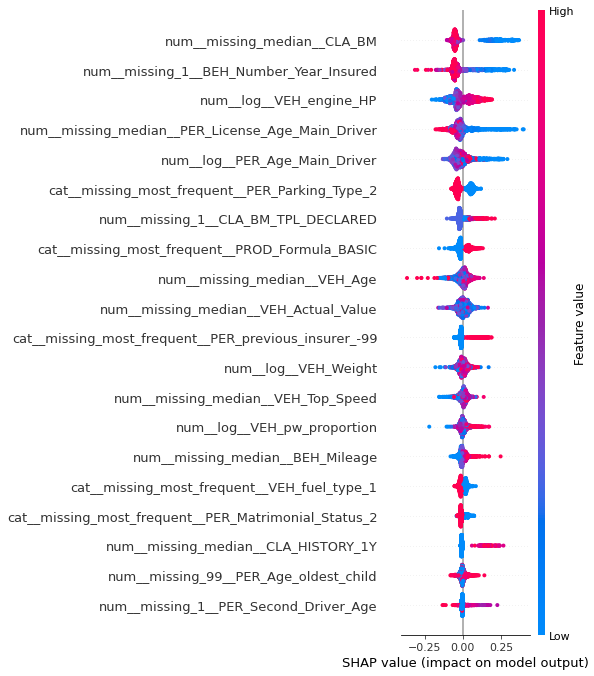

In [79]:
shap.summary_plot(shap_values, X_test_prep)

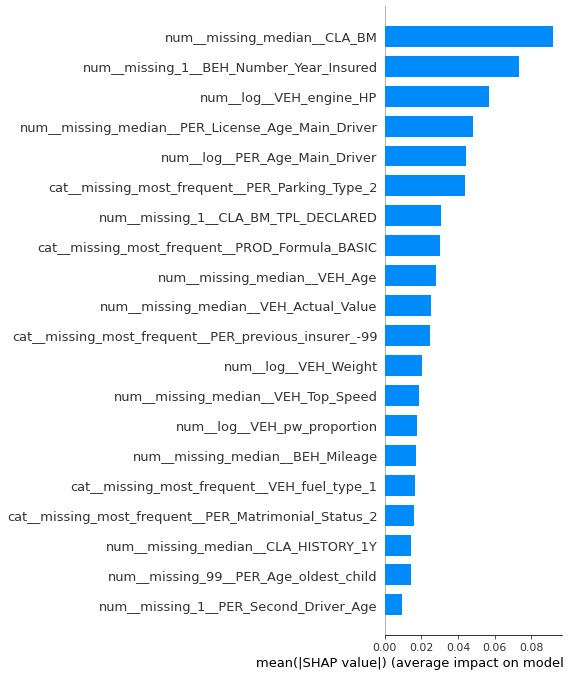

In [80]:
shap.summary_plot(shap_values, X_test_prep, plot_type="bar")

In [81]:
y_pred_log = xgboost_reg1.predict(X_test_prep)
y_pred = np.exp(y_pred_log)
df_pred =pd.DataFrame(data = y_pred, columns = ['y_pred'] )

In [82]:
df_contribs = pd.DataFrame(
        shap_values,
        columns=[col+'_contrib' for col in X_test_prep.columns],
        index=X_test_prep.index

).reset_index(drop=True)

df_test = X_test_prep.reset_index(drop=True)

df_ytest = pd.DataFrame(list(y_test), columns = ['y_test'] ) # ligne modifiée

df_contribs 
df = pd.concat([ df_test,df_contribs, df_pred, df_ytest ], axis=1) 
df[['y_pred', 'y_test']]

y_pred  y_test
0     351.347534  352.00
1     298.561676  280.05
2     420.153778  384.00
3     710.947021  729.00
4     309.155029  309.64
...          ...     ...
1992  396.235962  395.70
1993  807.044250  734.20
1994  331.103210  329.00
1995  428.732635  368.69
1996  519.559204  519.00

[1997 rows x 2 columns]

In [83]:
df['error']=  np.abs((df['y_test']- df['y_pred'] )/ df['y_test'])
df['error2'] = (df['y_test']- df['y_pred'] )**2
df[['error', 'error2']]

error       error2
0     0.001854     0.425712
1     0.066101   342.682149
2     0.094150  1307.095669
3     0.024764   325.910033
4     0.001566     0.235197
...        ...          ...
1992  0.001354     0.287255
1993  0.099216  5306.284829
1994  0.006393     4.423494
1995  0.162854  3605.118078
1996  0.001077     0.312709

[1997 rows x 2 columns]

<Axes: >

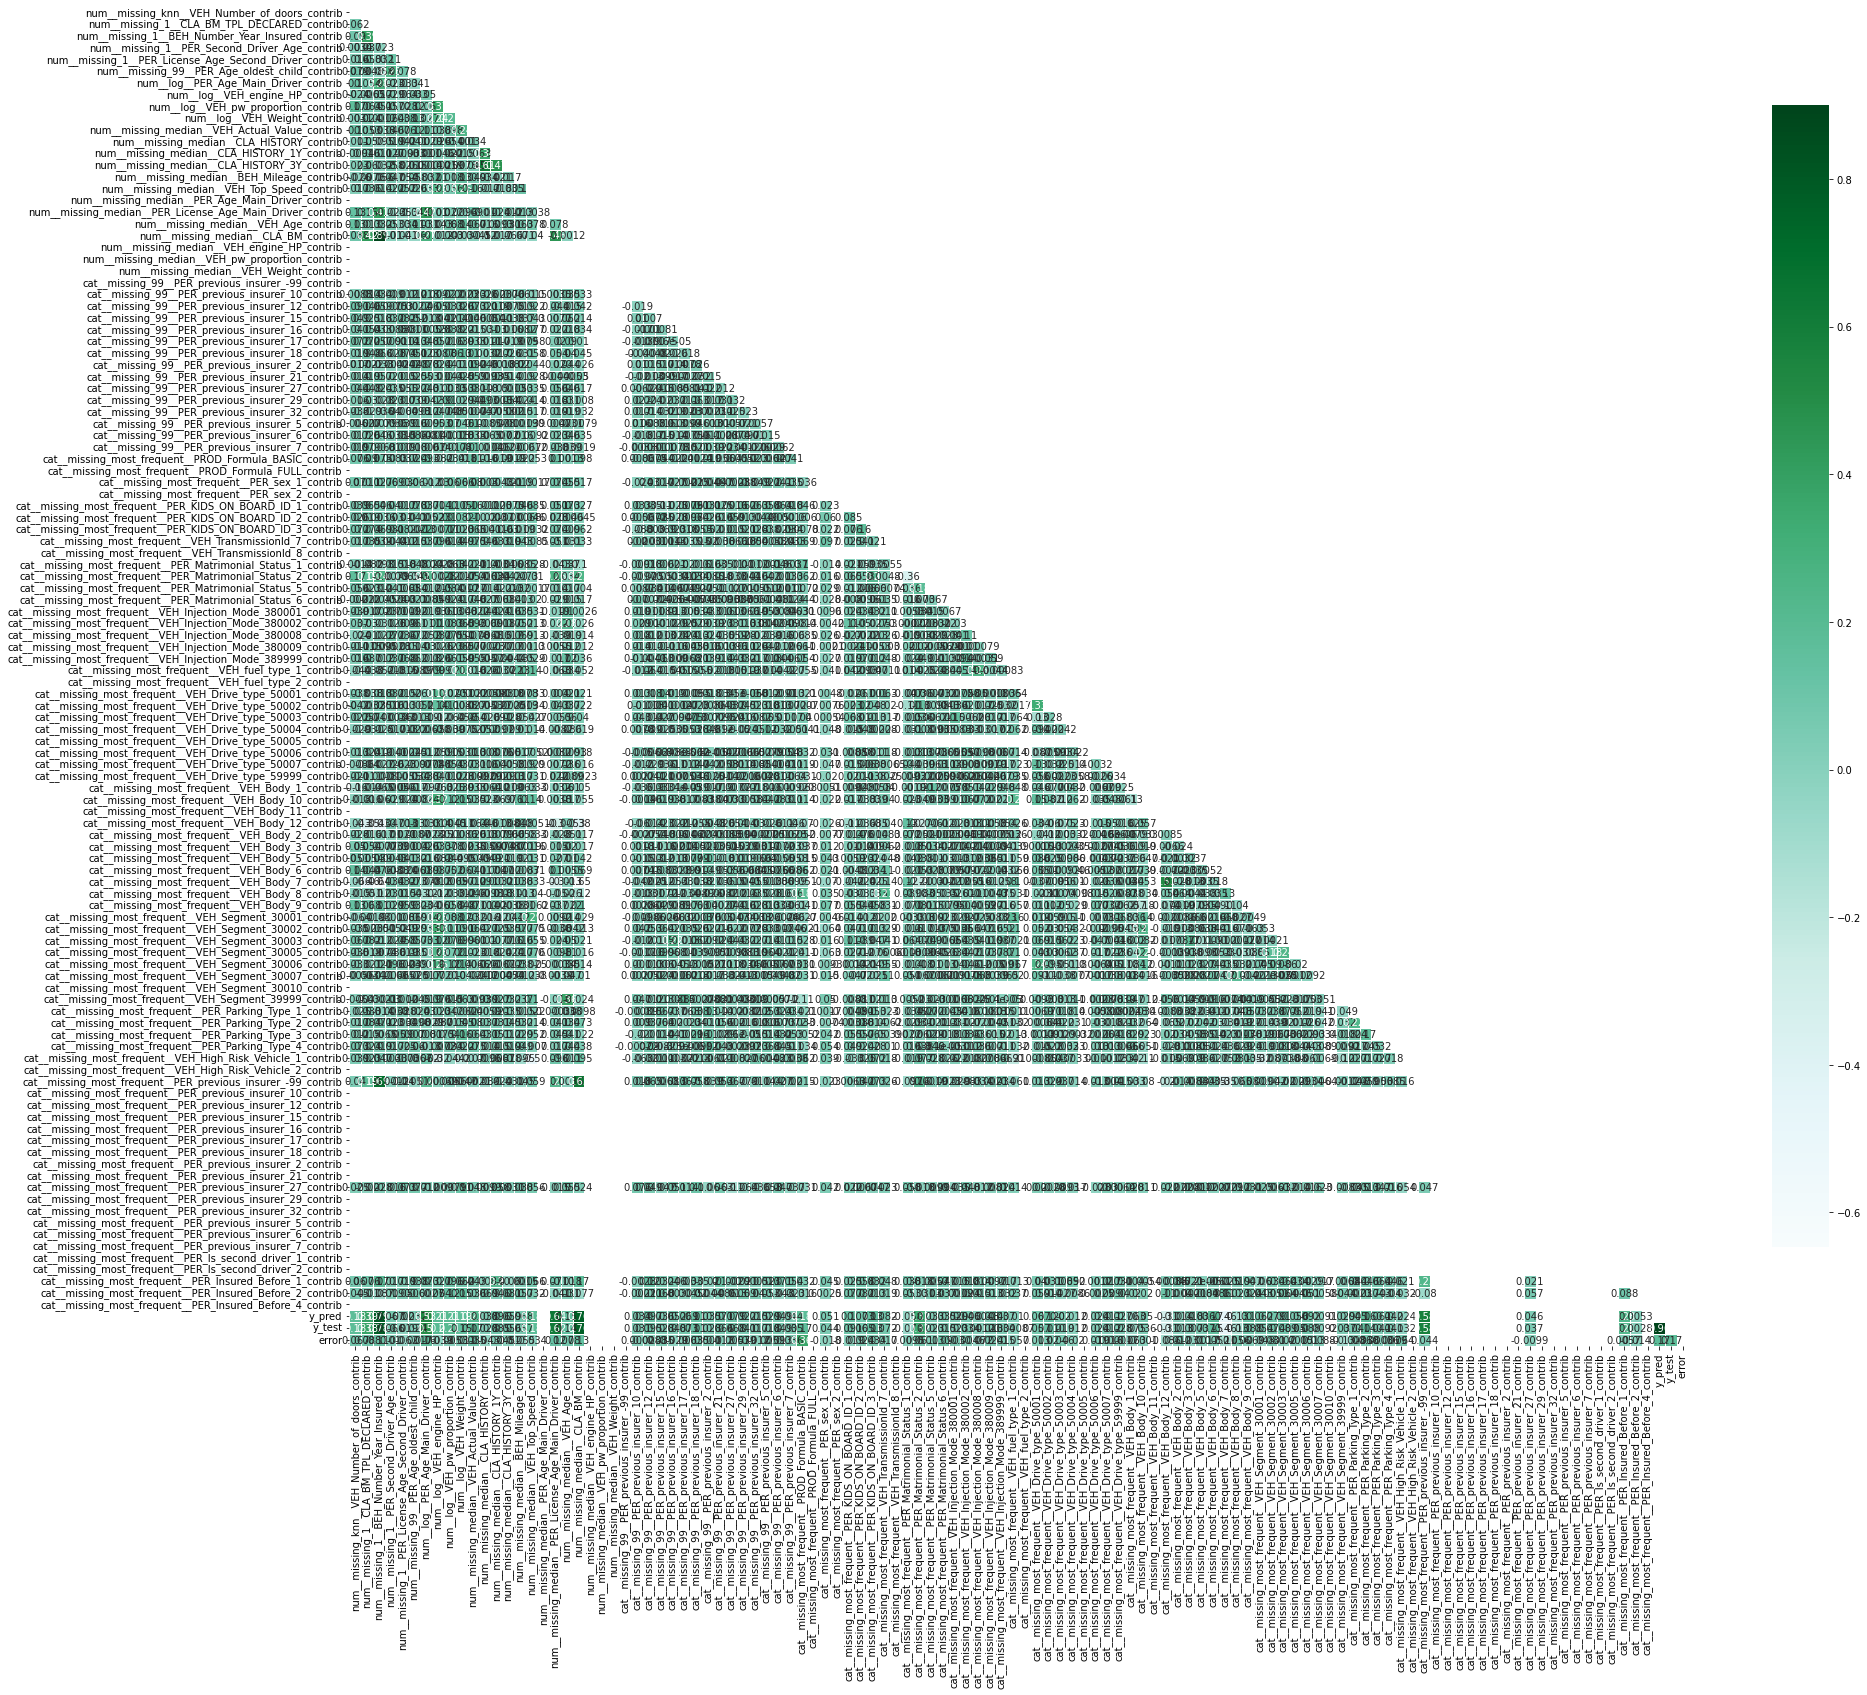

In [84]:
corr = df[[col for col in df.columns if col.endswith('_contrib')]+['y_pred', 'y_test', 'error']].corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (30,30))
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle
sn.heatmap(corr, mask=mask, vmax = 0.9, cmap='BuGn', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7})

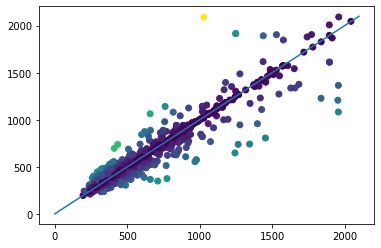

In [85]:
plt.scatter(df['y_test'], df['y_pred'], c=df['error'])
plt.plot([0, 2100], [0, 2100])